<a href="https://colab.research.google.com/github/DHileep14/House-Price-Prediction/blob/main/house_price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data Loading

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer
from sklearn.impute import SimpleImputer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score,KFold, cross_validate
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.metrics import r2_score,mean_squared_error

plt.style.use('fivethirtyeight')

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore",category=matplotlib.MatplotlibDeprecationWarning)

In [3]:
train_df = pd.read_csv("/content/train.csv")
test_df = pd.read_csv("/content/test.csv")
df = train_df.copy()
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

## Data Information

### Data Column Summary

#### Type of Property and Zone
- `MSSubClass`: This is Categorical Column telling the Type of Dwelling Sold.
- `MSZoning` : This Tells the type of property i.e Residential, Agricultural etc. Sold.

#### Property Lot Configuration
These columns Tell the Size , type, shape etc. of the Lot
- `LotFrontage` : Linear feet of street connected to property.
- `LotArea` : Lot size in square feet.
- `LotShape` : General shape of property.
- `LotConfig` : Lot configuration,

#### Connectivity of plot
- `Street`: Type of road access to property (Gravel/Paved).
- `Alley`: Type of alley access to property (Gravel/Paved/No access).

#### Land Configuration
- `LandContour` : Flatness of the property (Lvl/Bnk/HLS/Low) implying Leveled/Banked/Hillside/Depression
- `LandSlope`: Slope of property (Gentle/Moderate/Severe)

#### Utilities and Neighbourhood Proximities
- `Utilities` : Type of utilities available.
- `Neighborhood` : Physical locations (25 categories) within Ames city limits. Example- Bloomington Heights, College Creek etc.
- `Condition1`: Proximity to various conditions (9)
- `Condition2`: Proximity to various conditions (9) (if more than one is present)

#### Building Details
- `BldgType`: Type of dwelling (Single-family Detached/Two-family Conversion/Duplex/Townhouse End Unit/Townhouse Inside Unit)
- `HouseStyle`: Tells the Story of House and whether it is finished or not. (8 cat)
- `OverallQual`: Rates the overall material and finish of the house. (1-10)
- `OverallCond`: Rates the overall condition of the house. (1-10)
- `YearBuilt` : Year built
- `YearRemodAdd`: Remodel date (same as construction date if no remodeling or additions)
- `RoofStyle`: Type of roof (Flat/Gable/Gambrel/Hip/Mansard/Shed).

#### Material and Craftmanship
- `RoofMatl`: Roof material. (8 categories)
- `Exterior1st`: Exterior covering on house.(Material Used) (15 categ)
- `Exterior2nd`: Exterior covering on house (if more than one material) (15 categ)
- `MasVnrType`: Masonry veneer type (5)
- `MasVnrArea`: Masonry veneer area in square feet
- `ExterQual`: Evaluates the quality of the material on the exterior (5)
- `ExterCond`: Evaluates the present condition of the material on the exterior.(5)
- `Foundation`: Type of foundation.(6)

#### Basement
- `BsmtQual`: Evaluates the height of the basement.(6)
- `BsmtCond`: Evaluates the general condition of the basement. (6)
- `BsmtExposure`: Refers to walkout or garden level walls.(5)
- `BsmtFinType1`: Rating of basement finished area.(7)
- `BsmtFinSF1`: Type 1 finished square feet
- `BsmtFinType2`: Rating of basement finished area (if multiple types) (7)
- `BsmtFinSF2`: Type 2 finished square feet
- `BsmtUnfSF`: Unfinished square feet of basement area.
- `TotalBsmtSF`: Total square feet of basement area

#### Amenities
- `Heating`: Type of heating.(6)
- `HeatingQC`: Heating quality and condition.(5)
- `CentralAir`: Central air conditioning, (Y/N)
- `Electrical`: Electrical system. (5)

#### Areas
- `1stFlrSF`: First Floor square feet
- `2ndFlrSF`: Second floor square feet
- `LowQualFinSF`: Low quality finished square feet (all floors)
- `GrLivArea`: Above grade (ground) living area square feet

#### Bedroom, Bathroom, Kitchen, FirePlaces and Other Room details
- `BsmtFullBath`: Basement full bathrooms
- `BsmtHalfBath`: Basement half bathrooms
- `FullBath`: Full bathrooms above grade
- `HalfBath`: Half baths above grade
- `Bedroom`: Bedrooms above grade (does NOT include basement bedrooms)
- `Kitchen`: Kitchens above grade
- `KitchenQual`: Kitchen quality. (5)
- `TotRmsAbvGrd`: Total rooms above grade (does not include bathrooms)
- `Functional`: Home functionality (Assume typical unless deductions are warranted).(8)
- `Fireplaces`: Number of fireplaces
- `FireplaceQu`: Fireplace quality (5+1(no fireplace))

#### Garage
- `GarageType`: Garage location. (6+1)
- `GarageYrBlt`: Year garage was built.
- `GarageFinish`: Interior finish of the garage.
- `GarageCars`: Size of garage in car capacity.
- `GarageArea`: Size of garage in square feet
- `GarageQual`: Garage quality (5+1).
- `GarageCond`: Garage condition (5+1).
- `PavedDrive`: Paved driveway (Y(Yes),P(Partial)/N(Dirt/Gravel)).

#### Other Areas and Luxuries
- `WoodDeckSF`: Wood deck area in square feet
- `OpenPorchSF`: Open porch area in square feet
- `EnclosedPorch`: Enclosed porch area in square feet
- `3SsnPorch`: Three season porch area in square feet
- `ScreenPorch`: Screen porch area in square feet
- `PoolArea`: Pool area in square feet
- `PoolQC`: Pool quality (4+1)
- `Fence`: Fence quality (4+1)
- `MiscFeature`: Miscellaneous feature not covered in other categories. (5+1)
- `MiscVal`: $Value of miscellaneous feature

#### Sale Details
- `MoSold`: Month Sold (MM)
- `YrSold`: Year Sold (YYYY)
- `SaleType`: Type of sale. (10)
- `SaleCondition`: Condition of sale.(6)

## Missing Data Information

In [4]:
df.isnull().sum()[df.isnull().sum() >0].sort_values(ascending=False)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtExposure      38
BsmtFinType2      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
Electrical         1
dtype: int64

We will drop these first 4 columns and deal with others later.

In [5]:
removed_cols = ['PoolQC','MiscFeature','Alley','Fence']
df.drop(columns=removed_cols,inplace =True)

## Target Column SalePrice

Skewness: 1.8828757597682129


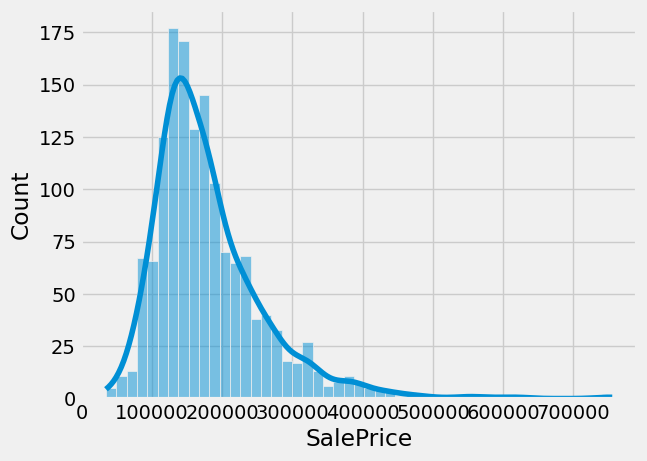

In [6]:
print(f"Skewness: { df['SalePrice'].skew() }")
sns.histplot(x = df['SalePrice'],kde=True)
plt.show()

Skewness: 0.12133506220520406


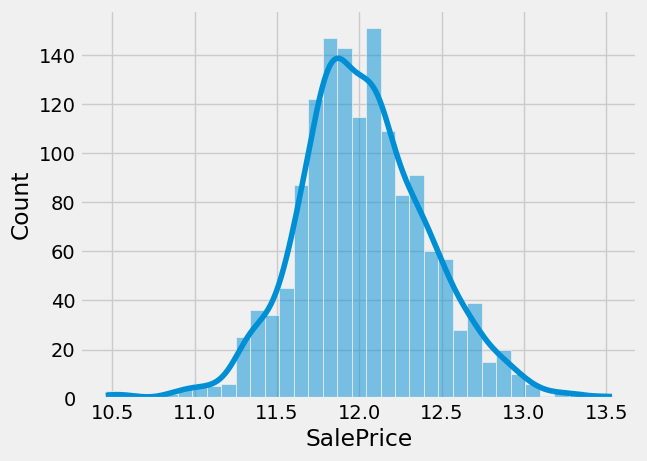

In [7]:
# Log Transformation
print(f"Skewness: { (np.log(df['SalePrice'])).skew() }")
sns.histplot(x = np.log(df['SalePrice']),kde=True)
plt.show()

We will perform log transformation on SalePrice.

In [8]:
df['SalePrice'] = np.log(df['SalePrice'])

## Exploratory Data Analysis (EDA)

#### Graph Custom Functions

In [9]:
# For Numerical Columns
def hist_box_scat_graph(columns_list,df,target_column='SalePrice'):
    '''
    columns_list: list of columns you want to plot.
    df: Dataframe from which columns to be plot.
    target_column : column against which you want to plot scatter plot.
    '''
    for col in columns_list:
        plt.figure(figsize=(15, 3))
        plt.title(col)

        plt.subplot(1,3,1)
        sns.histplot(x = df[col], kde=True)
        plt.xlabel(col)
        plt.ylabel('Frequency')

        plt.subplot(1,3,2)
        sns.boxplot(x=df[col])

        plt.subplot(1,3,3)
        sns.scatterplot(x=df[col],y=df[target_column])

        plt.show()
        plt.close()

In [10]:
### For Categorical Columns

def bar_box_pie_plot(cat_col_list,df,target_column = 'SalePrice'):
    '''
    columns_list: list of columns you want to plot.
    df: Dataframe from which columns to be plot.
    target_column : column against which you want to plot boxplot.
    '''
    for col in cat_col_list:
        temp = df[col].value_counts().reset_index()
        temp.columns = [col, 'Count']

        plt.figure(figsize=(15, 3))
        plt.title(col)

        plt.subplot(1,3,1)
        sns.barplot(temp,x=col,y='Count')
        plt.xticks(rotation=90)

        plt.subplot(1,3,2)
        sns.boxplot(df,x=col,y = target_column)
        plt.xticks(rotation=90)

        plt.subplot(1,3,3)
        plt.pie(x = temp['Count'],autopct='%.2f',labels=temp[col])
        plt.show()
        plt.close()

### Columns with Numerical Datatype

We have to separate out numerical columns from categorical columns. As I already know what columns are numerical i will use that list. But you can create a function which will separate out numerical data for you.

In [11]:
num_cols = ['LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF', '2ndFlrSF','LowQualFinSF', 'GrLivArea',
           'GarageArea', 'WoodDeckSF','OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea','MiscVal','SalePrice']

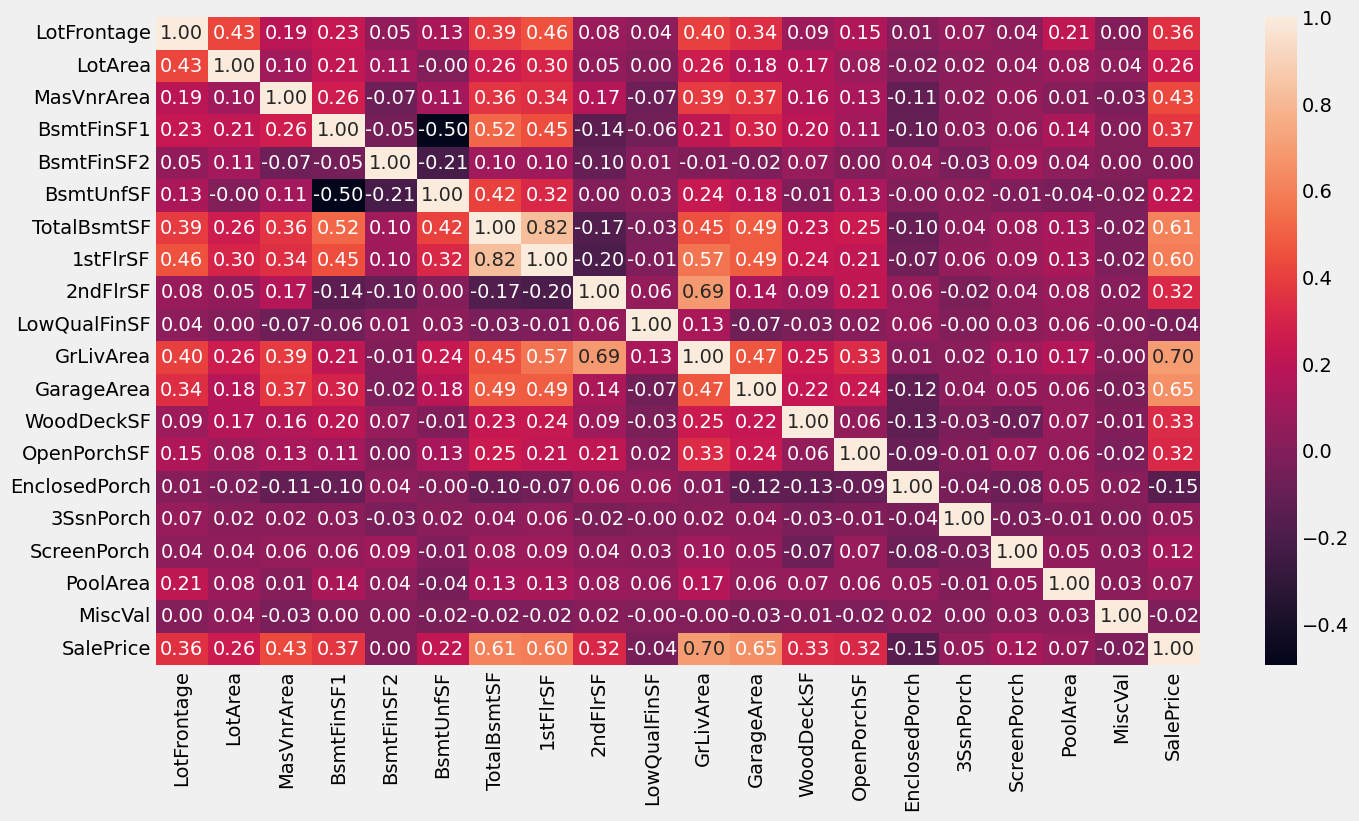

In [12]:
plt.figure(figsize=(15,8))
sns.heatmap(df[num_cols].corr(numeric_only=True),annot=True, fmt=".2f")
plt.show()

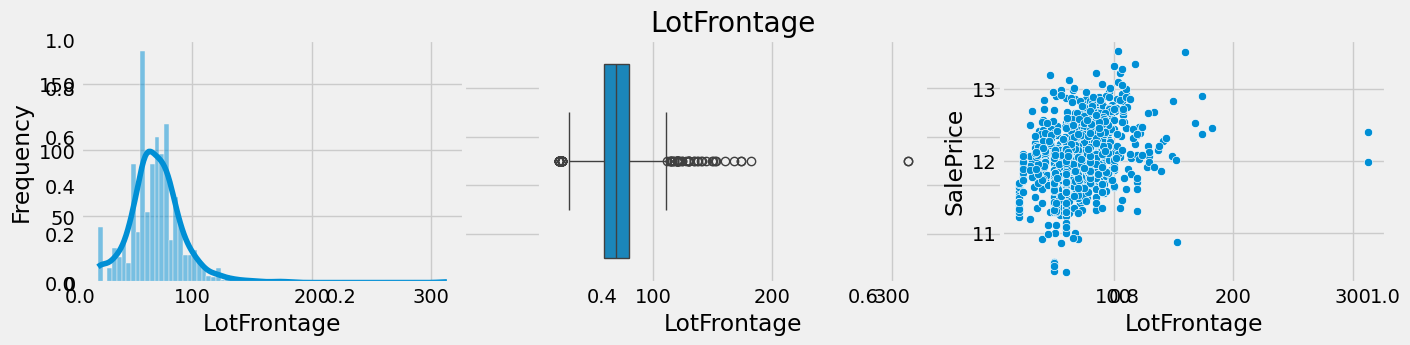

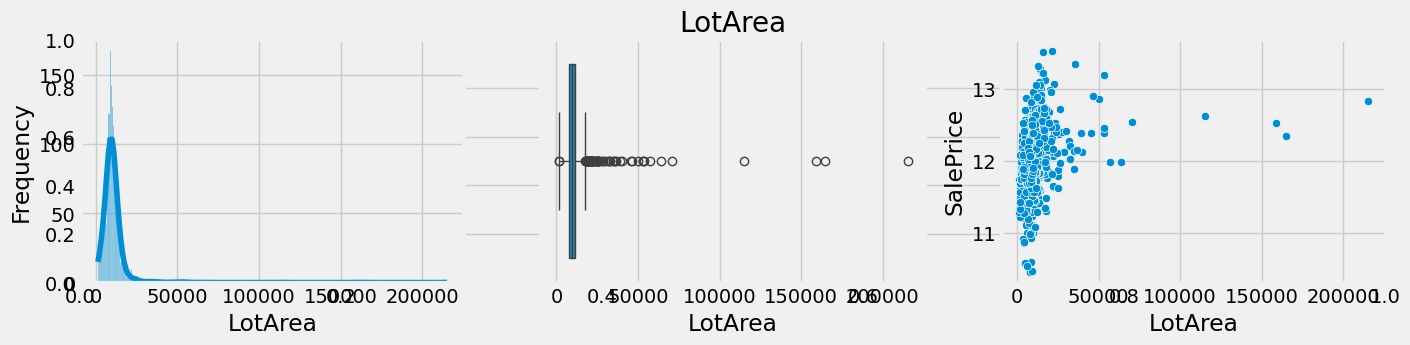

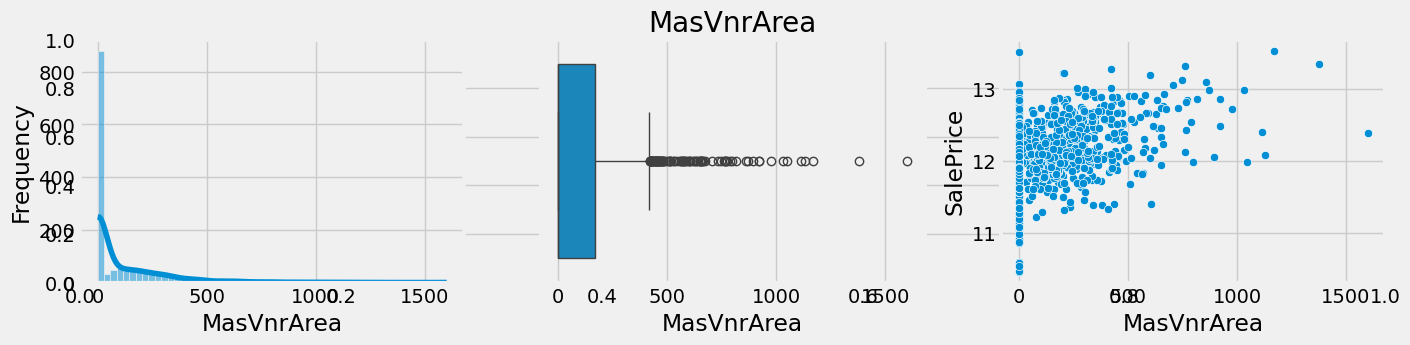

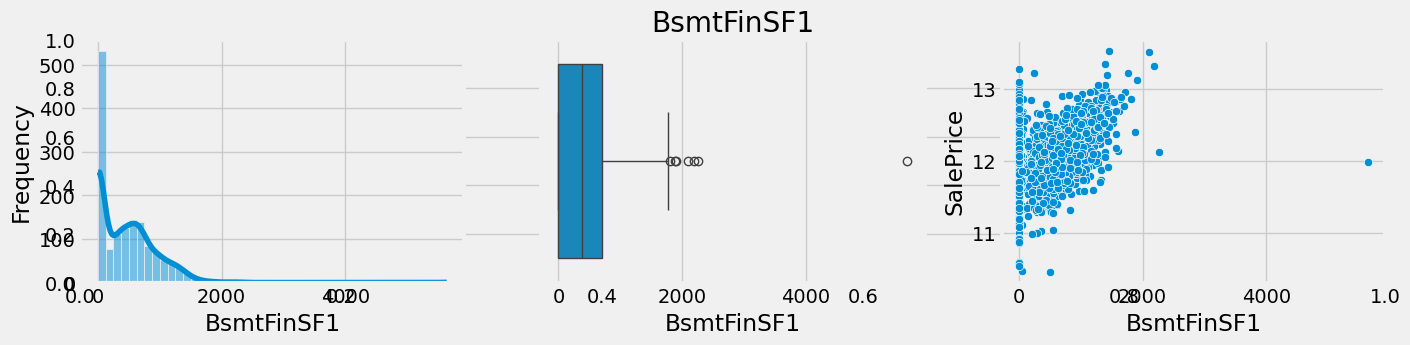

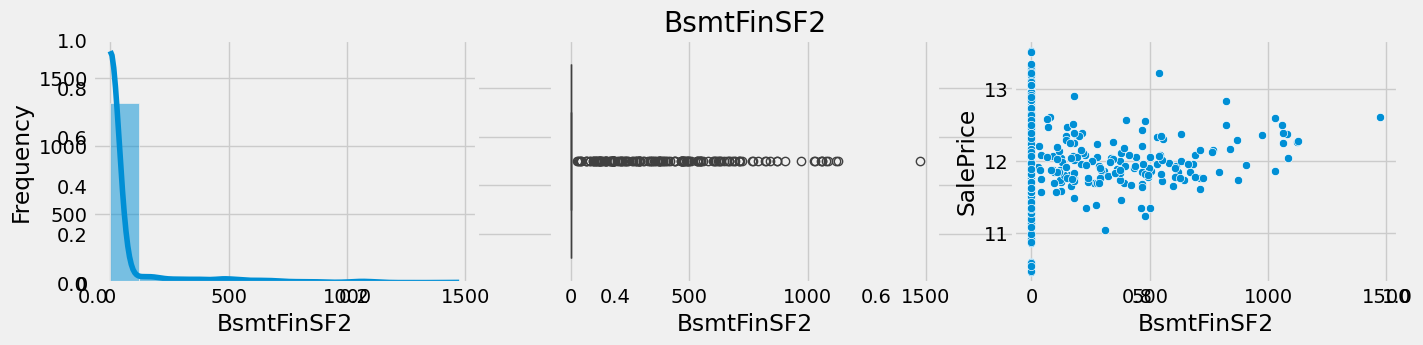

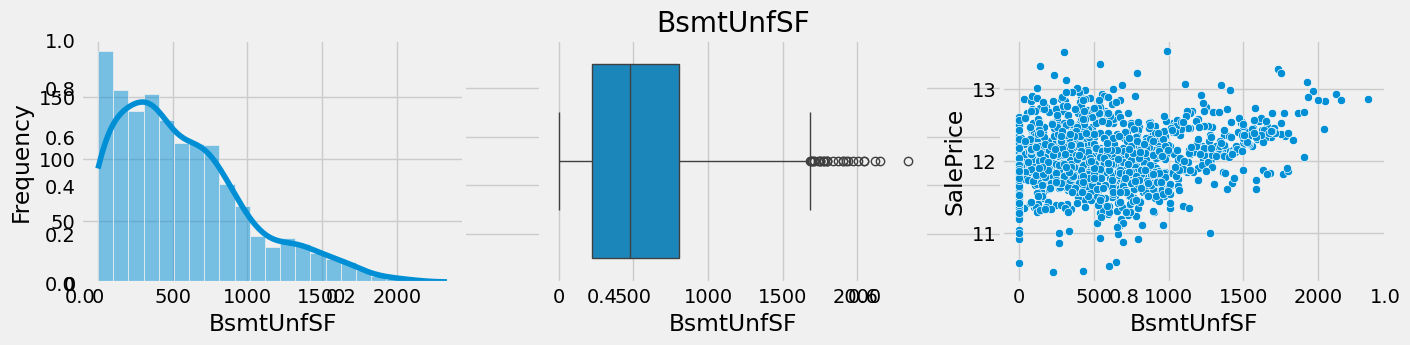

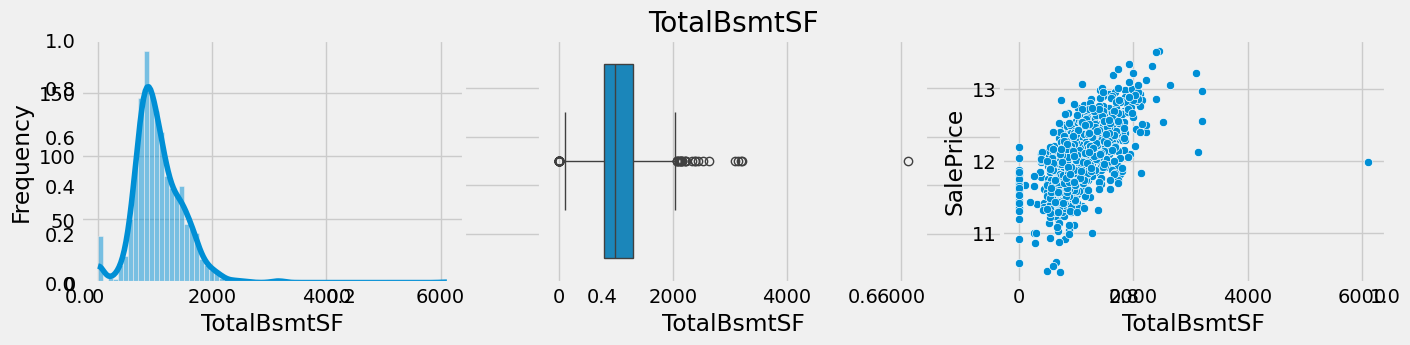

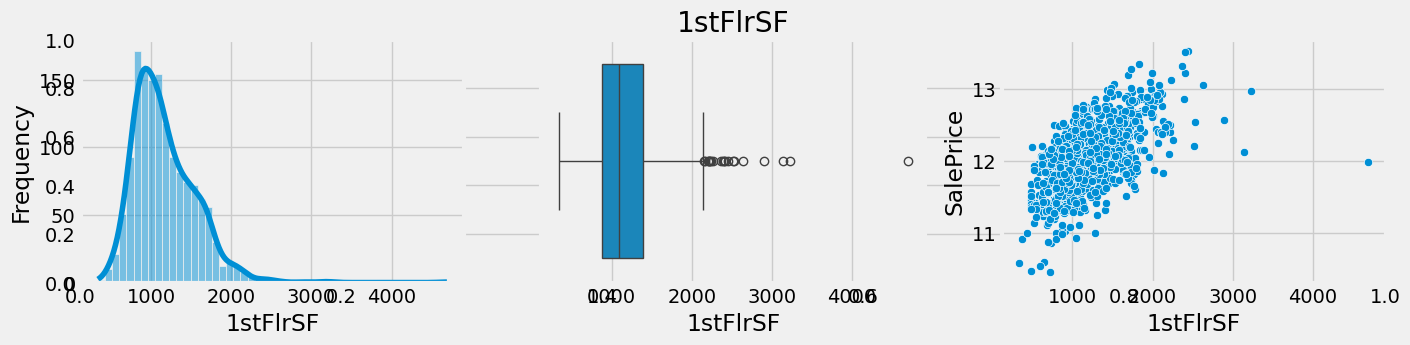

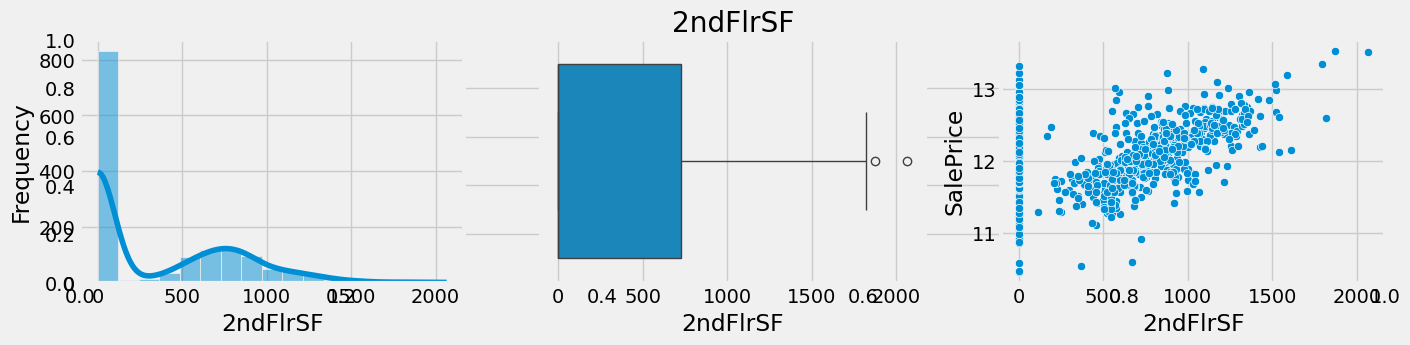

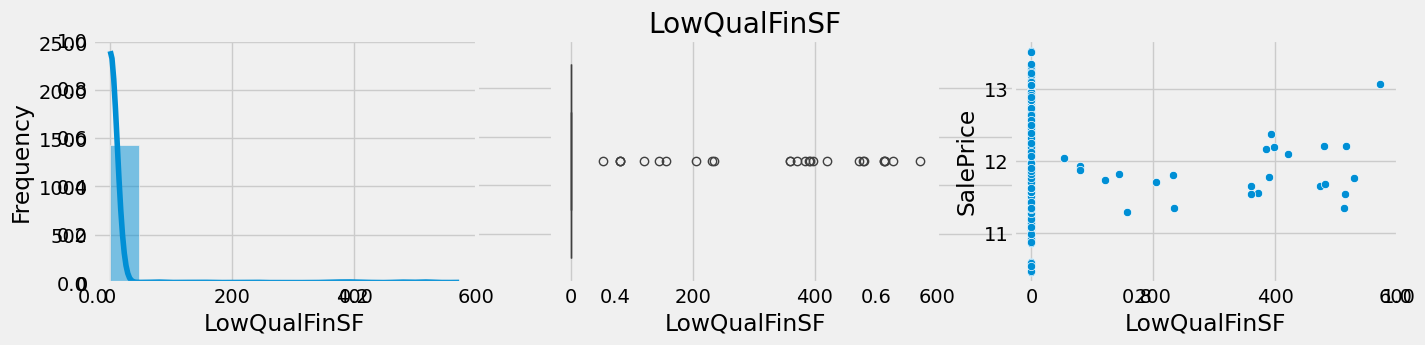

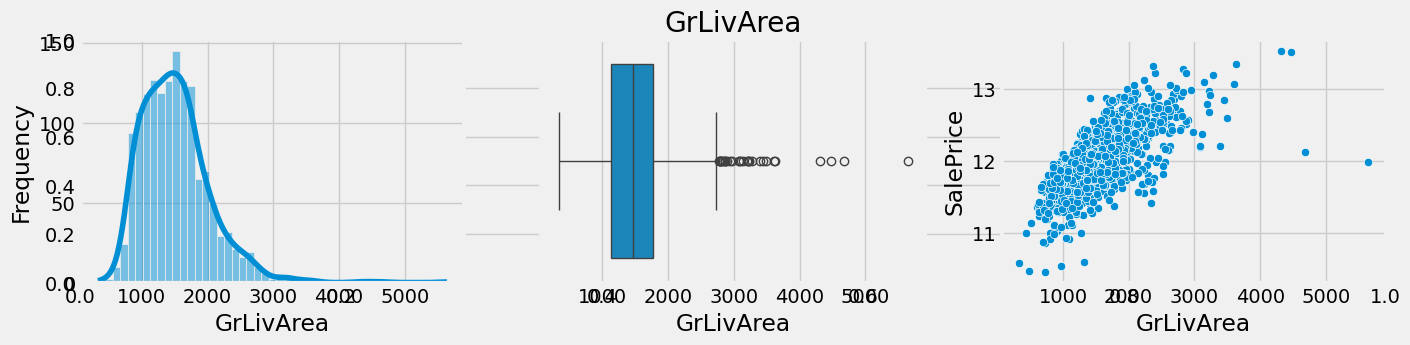

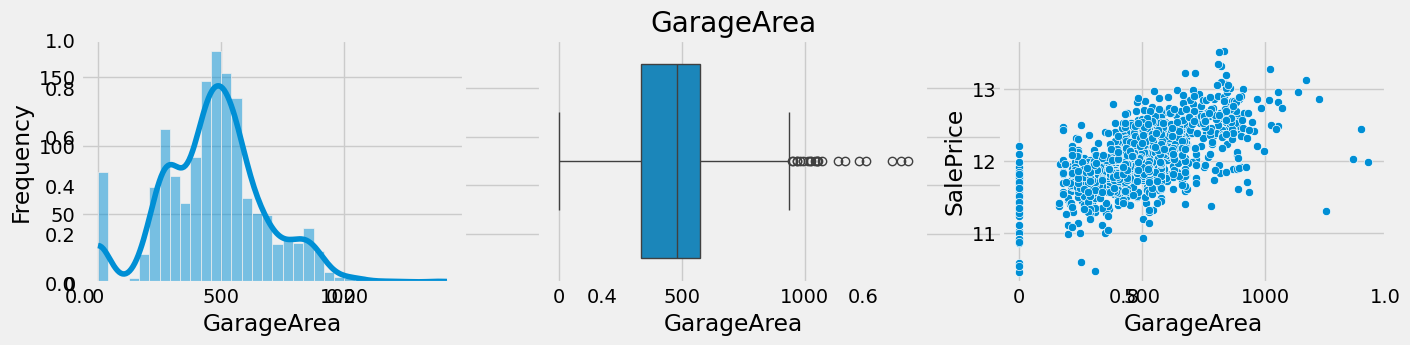

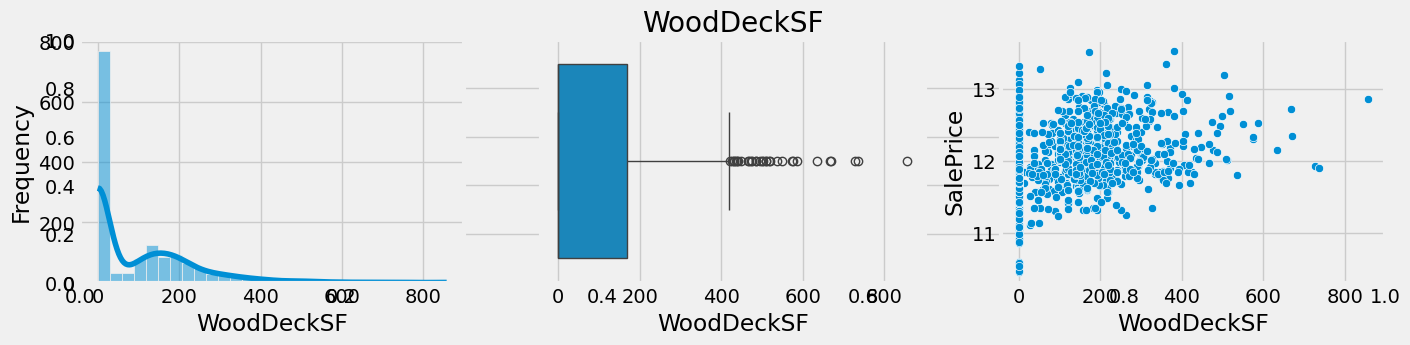

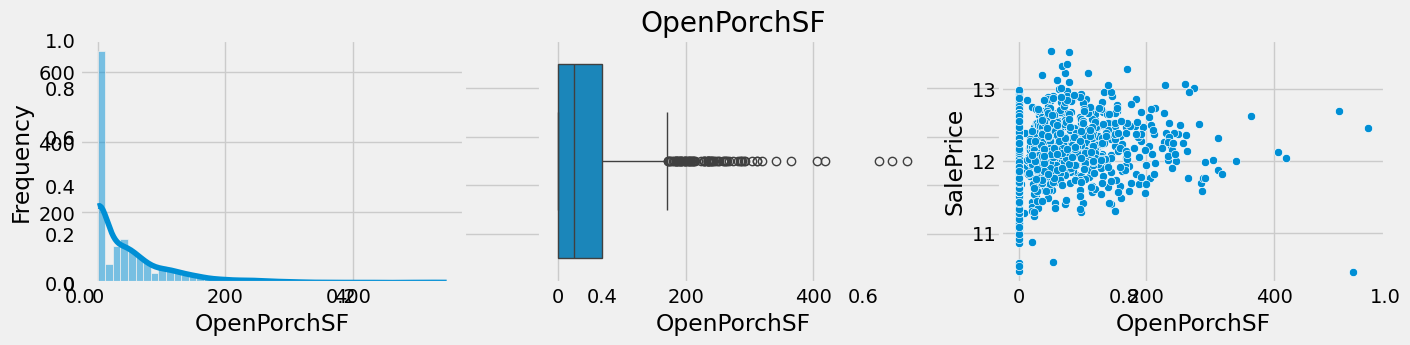

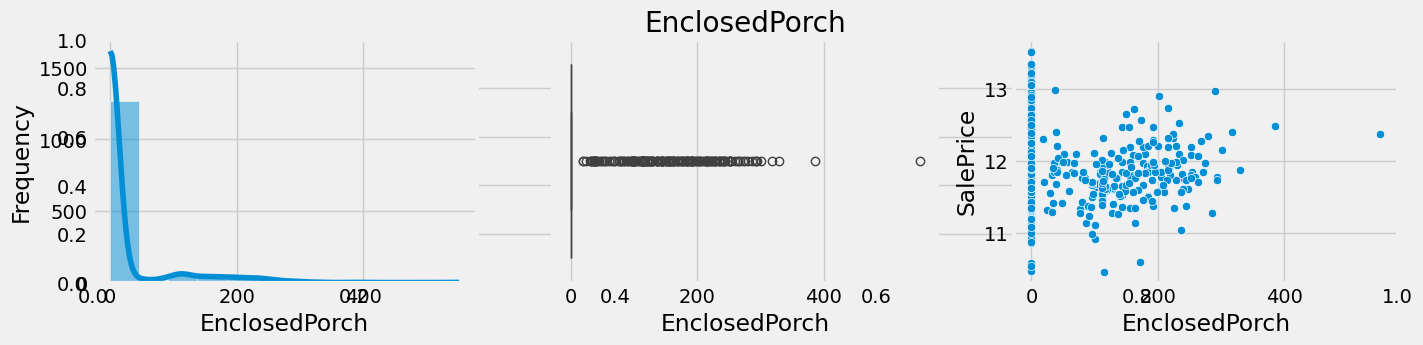

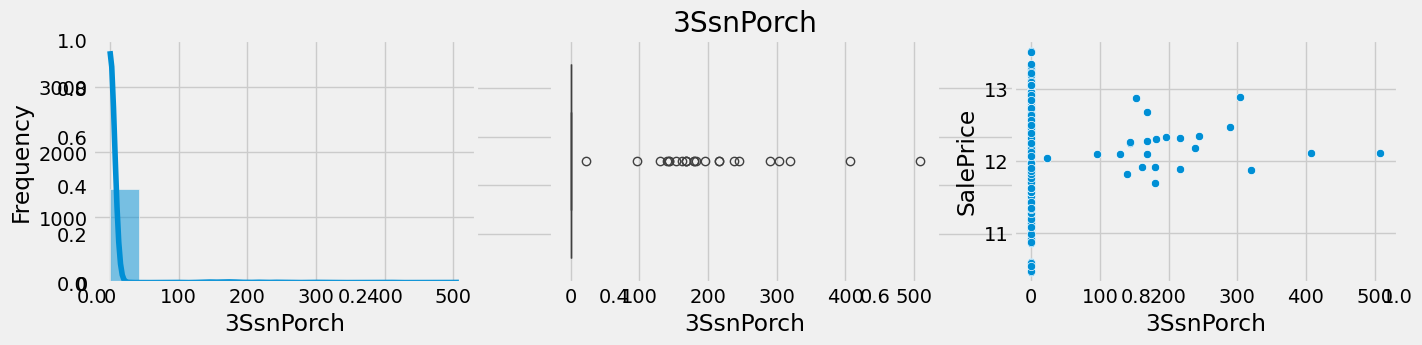

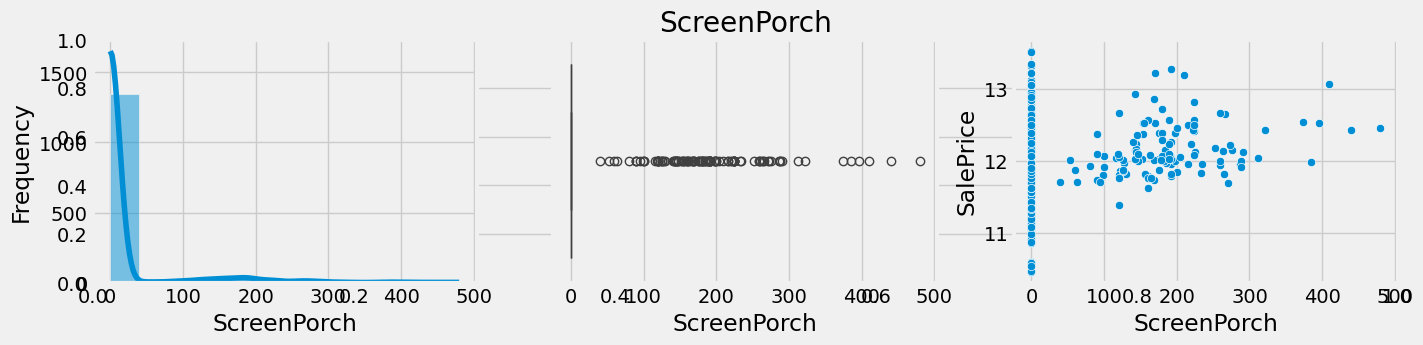

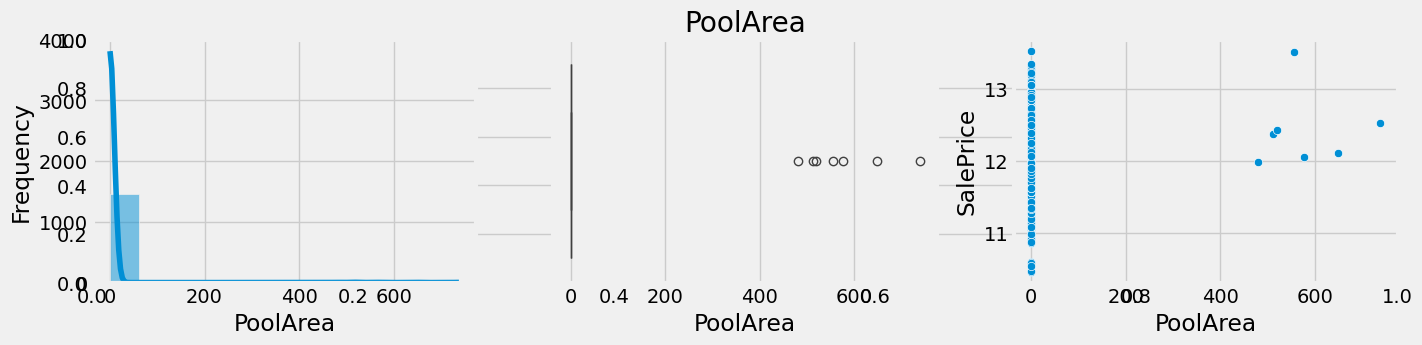

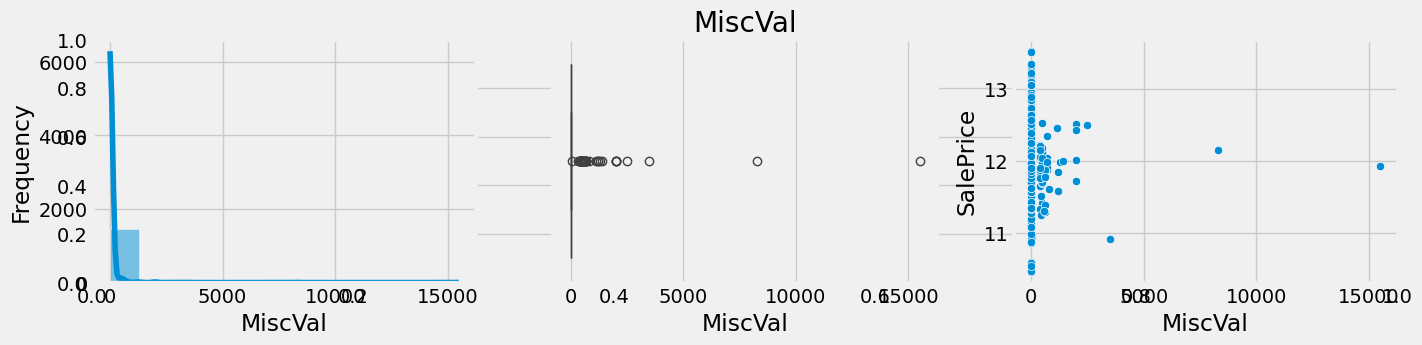

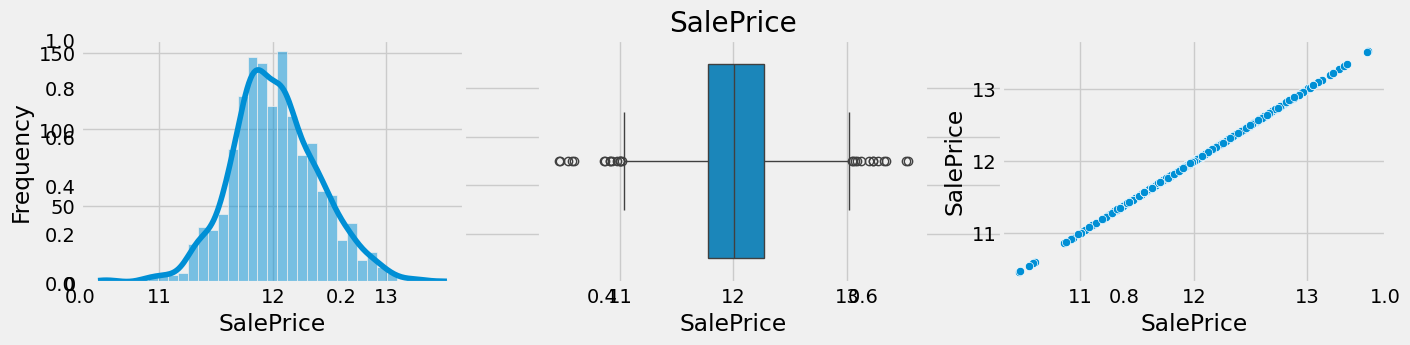

In [13]:
hist_box_scat_graph(num_cols,df)

#### Observations
- There are lot of columns which have extreme no. of Zero values. These are 'LowQualFinSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal'. We will simply drop these Columns.
- Lot of Columns have highly skewed data and outliers. So we will do log transformation and remove outliers.
- 'TotalBsmtSF' is a sum of these Basement columns 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF'. That's why they have also have mild collinearity with the column. We will drop these.
- Similarly '1stFlrSF', '2ndFlrSF' is correlated with GrLivArea. they also have multicollinearity with other columns also.
- It also seems that LotFrontage and LotArea might be linearly Correlated. We have to look further into it by removing outliers and log transformation.
- `Columns to Remove`: 'LowQualFinSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', '1stFlrSF', '2ndFlrSF'

In [14]:
cols_remove = ['LowQualFinSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', '1stFlrSF', '2ndFlrSF']
df.drop(columns=cols_remove,inplace =True)
removed_cols += cols_remove

In [15]:
for i in cols_remove:
    num_cols.remove(i)

#### LotFrontage and LotArea

In [16]:
temp_df = df[['LotFrontage','LotArea','SalePrice']].copy()

In [17]:
temp_df[temp_df['LotArea'] > 100000].index

Index([249, 313, 335, 706], dtype='int64')

In [18]:
temp_df[temp_df['LotFrontage'] > 200].index

Index([934, 1298], dtype='int64')

In [19]:
temp_df.drop([249, 313, 335, 706,934, 1298],inplace =True)

In [20]:
temp_df['LotFrontage'] = np.log1p(temp_df['LotFrontage'])
temp_df['LotArea'] = np.log1p(temp_df['LotArea'])

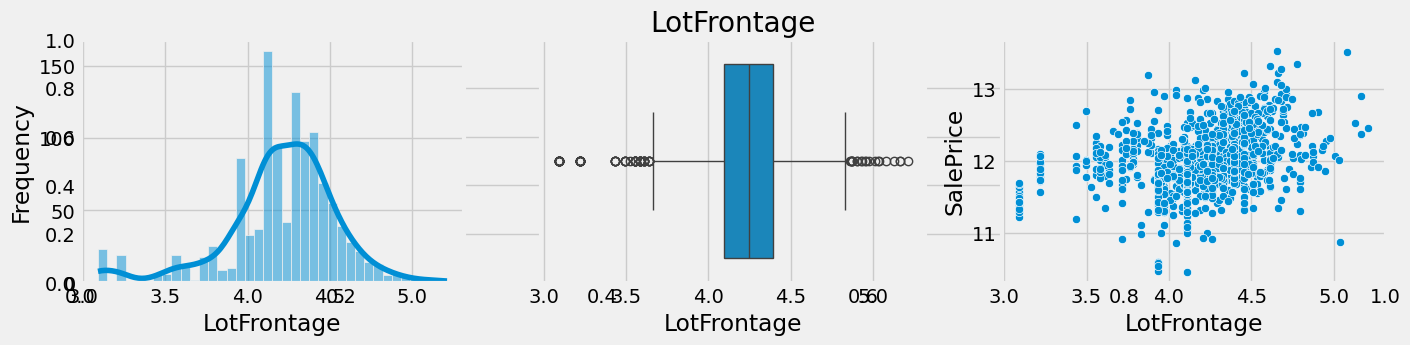

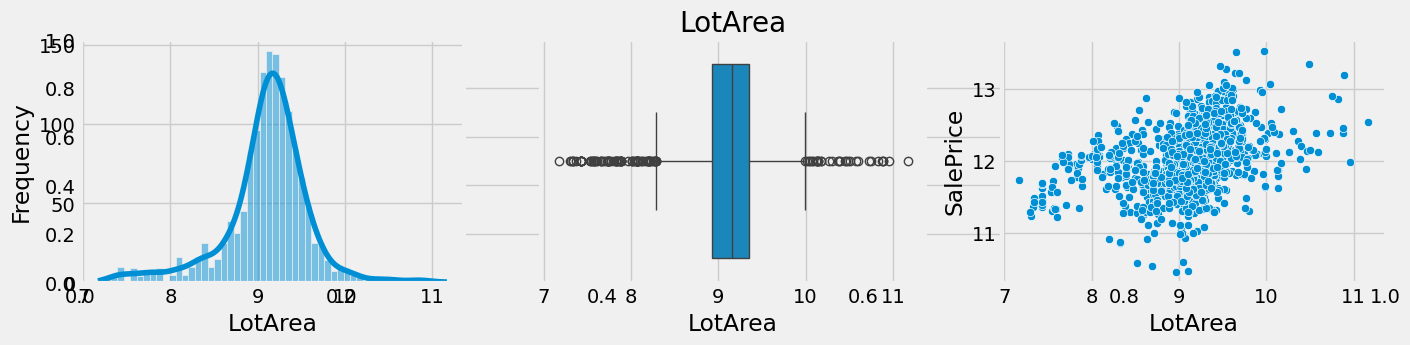

In [21]:
hist_box_scat_graph(['LotFrontage','LotArea'],temp_df)

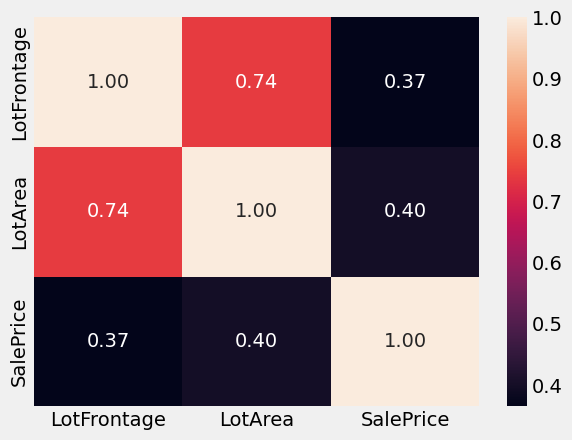

In [22]:
sns.heatmap(temp_df.corr(numeric_only=True),annot=True, fmt=".2f")
plt.show()

Above Experiment Prove that LotFrontage and LotArea are highly correlated. So now we will remove the outliers from our data and remove LotFrontage column and also perform LogTransformation on skewed columns.

## Removing Outliers

Columns with large number of outliers : 'LotArea', 'TotalBsmtSF'

In [23]:
outliers_rows = []
outliers_rows +=list(df[df['LotArea'] > 100000].index)
outliers_rows += list(df[df['TotalBsmtSF'] > 4000].index)

In [24]:
df.drop(outliers_rows,inplace = True)

## Transformations

Columns for Log Transformation : 'LotArea', 'GrLivArea', 'MasVnrArea','WoodDeckSF','OpenPorchSF'

In [25]:
# Log Transformation:
for i in ['LotArea', 'GrLivArea', 'MasVnrArea','WoodDeckSF','OpenPorchSF']:
    df[i] = np.log1p(df[i])


## Skewness:
for i in ['LotArea','TotalBsmtSF','GrLivArea', 'MasVnrArea','WoodDeckSF','OpenPorchSF']:
    print(f'Skewness of {i}: {df[i].skew()}')

Skewness of LotArea: -0.6986806172905351
Skewness of TotalBsmtSF: 0.5762837921321455
Skewness of GrLivArea: -0.04124713400122581
Skewness of MasVnrArea: 0.4970481845754487
Skewness of WoodDeckSF: 0.15473775067300993
Skewness of OpenPorchSF: -0.023044318112576366


In [26]:
removed_cols += ['LotFrontage']
df.drop(columns='LotFrontage',inplace = True)

In [27]:
num_cols.remove('LotFrontage')

Let's look at all the numerical columns available in dataset whether it is categorical with numerical values or numerical

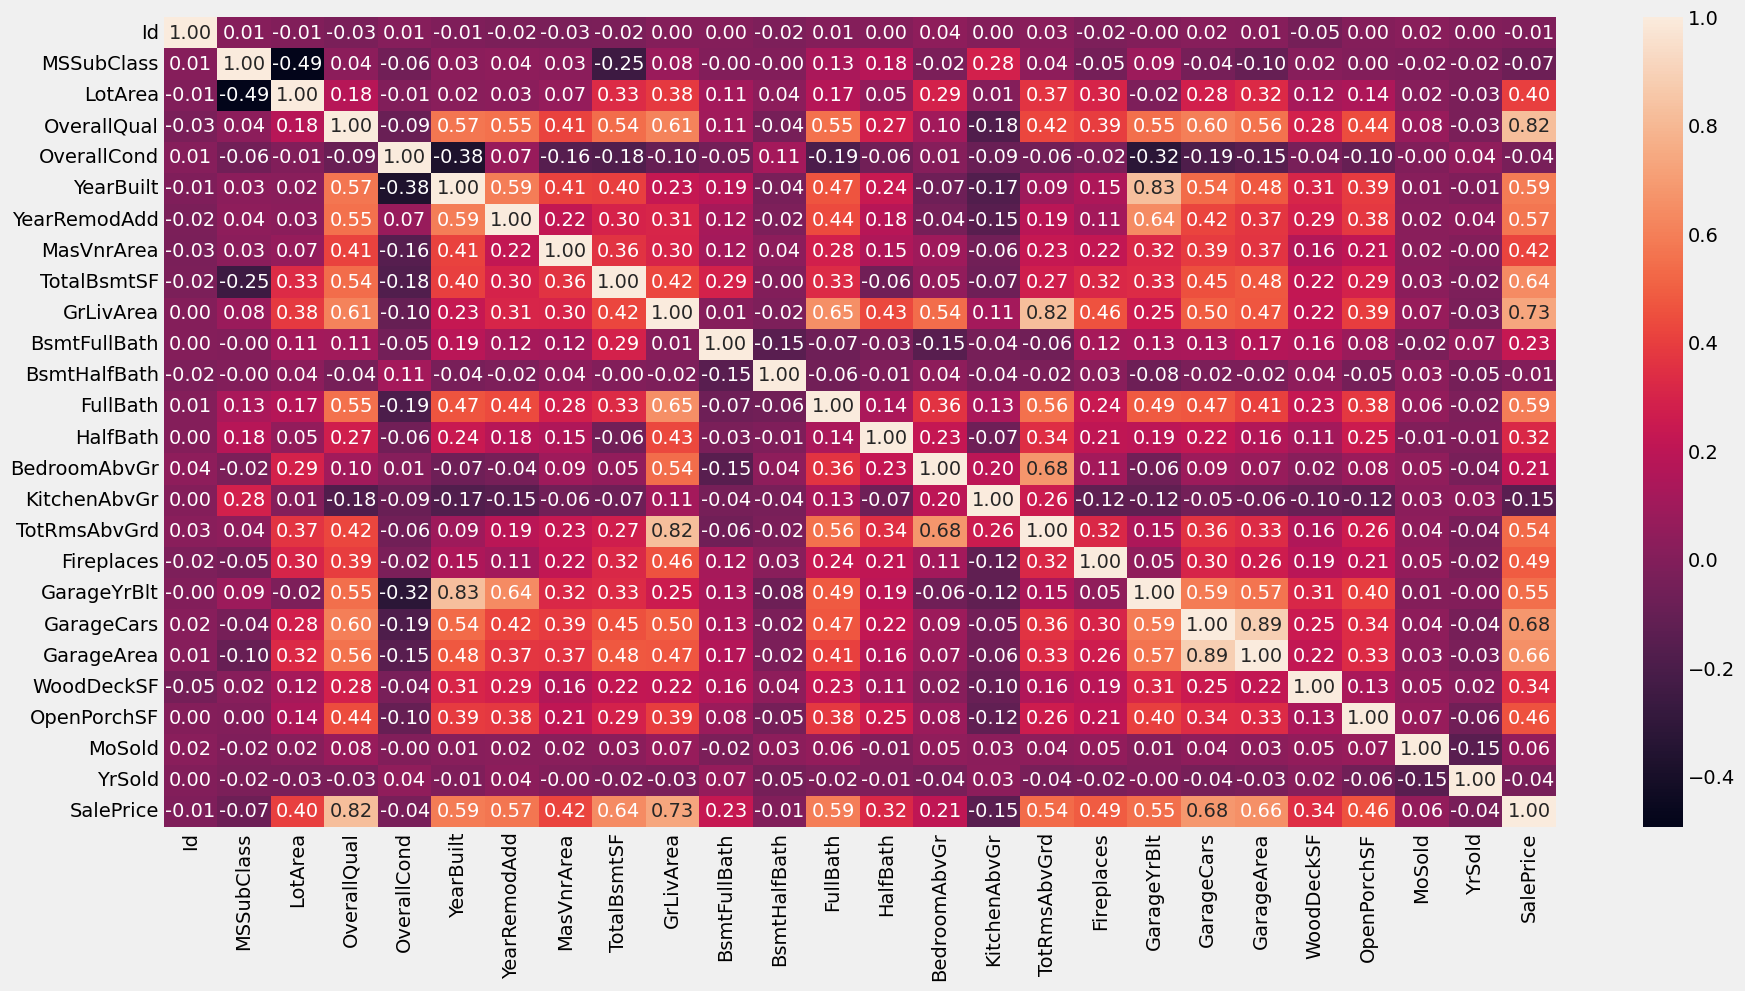

In [28]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(numeric_only=True),annot=True, fmt=".2f")
plt.show()

#### Observations
- `Low Correlation Columns` - 'Id','OverallCond','MoSold','YrSold'.
- Even though MSSubClass have low correlation I will still keep it as low corr may be due to high cardinality.
- We can perform feature engineering and convert [BsmtFullBath + FullBath] to TotalFullBath and [BsmtHalfBath + HalfBath] to TotalHalfBath.
#### Columns with Multicollinearity :
- GarageYrBlt - YearBuilt
- TotRmsAbvGrd - GrLivArea
- GarageArea - GarageCars
From These above Columns we will keep which have better correlation with TargetColumn -'SalePrice'.
#### Columns to drop:
- 'Id','OverallCond','MoSold','YrSold','GarageYrBlt', 'TotRmsAbvGrd','GarageArea'
- After Feature Engineering - BsmtFullBath , FullBath , BsmtHalfBath , HalfBath

## Feature Engineering and Dropping columns

In [29]:
### Feature Engineering
TotalFullBaths = df['FullBath'] + df['BsmtFullBath']
TotalFullBaths = TotalFullBaths.rename('TotalFullBaths')
TotalHalfBaths = df['HalfBath'] + df['BsmtHalfBath']
TotalHalfBaths = TotalHalfBaths.rename('TotalHalfBaths')

In [30]:
cols_remove = ['Id','OverallCond','MoSold','YrSold','GarageYrBlt', 'TotRmsAbvGrd','GarageArea','BsmtFullBath', 'FullBath', 'BsmtHalfBath', 'HalfBath']
df.drop(columns=cols_remove,inplace =True)
removed_cols += cols_remove

In [31]:
num_cols.remove('GarageArea')

In [32]:
df.insert(loc=0,column='TotalFullBath',value=TotalFullBaths)

In [33]:
df.insert(loc=0,column='TotalHalfBath',value=TotalHalfBaths)

## Missing Data

### Conclusions after investigations
- MasVnrType have nan where no masonary work is done so we will fill it Notav and see if it is useful column.
- Similarty FireplaceQu have missing value where there are no Fire place so will fill it with Notav.
- Similarly in Garage Columns and Basement Columns with notav
- At location 948 BsmtExposure need to be filled with No as Bsmt is Unfinished by looking at data.
- Drop that single row with empty electical value.
- Similarly at location 332 BsmtFinType2 need to be filled with Unf.

##### Investigating Missing Columns

In [34]:
miss_perc = (df.isnull().sum()/len(df)).sort_values(ascending=False) * 100
miss_perc[miss_perc > 0]

MasVnrType      59.793814
FireplaceQu     47.422680
GarageQual       5.567010
GarageType       5.567010
GarageFinish     5.567010
GarageCond       5.567010
BsmtExposure     2.611684
BsmtFinType2     2.611684
BsmtQual         2.542955
BsmtCond         2.542955
BsmtFinType1     2.542955
MasVnrArea       0.549828
Electrical       0.068729
dtype: float64

In [35]:
df[['MasVnrType', 'FireplaceQu']]

MasVnrType FireplaceQu
0       BrkFace         NaN
1           NaN          TA
2       BrkFace          TA
3           NaN          Gd
4       BrkFace          TA
...         ...         ...
1455        NaN          TA
1456      Stone          TA
1457        NaN          Gd
1458        NaN         NaN
1459        NaN         NaN

[1455 rows x 2 columns]

In [36]:
df[['MasVnrType','MasVnrArea']]

MasVnrType  MasVnrArea
0       BrkFace    5.283204
1           NaN    0.000000
2       BrkFace    5.093750
3           NaN    0.000000
4       BrkFace    5.860786
...         ...         ...
1455        NaN    0.000000
1456      Stone    4.787492
1457        NaN    0.000000
1458        NaN    0.000000
1459        NaN    0.000000

[1455 rows x 2 columns]

In [37]:
df[['MasVnrType','MasVnrArea']][df['MasVnrType'].isnull()]

MasVnrType  MasVnrArea
1           NaN         0.0
3           NaN         0.0
5           NaN         0.0
8           NaN         0.0
9           NaN         0.0
...         ...         ...
1454        NaN         0.0
1455        NaN         0.0
1457        NaN         0.0
1458        NaN         0.0
1459        NaN         0.0

[870 rows x 2 columns]

In [38]:
df[['Fireplaces','FireplaceQu']]

Fireplaces FireplaceQu
0              0         NaN
1              1          TA
2              1          TA
3              1          Gd
4              1          TA
...          ...         ...
1455           1          TA
1456           2          TA
1457           2          Gd
1458           0         NaN
1459           0         NaN

[1455 rows x 2 columns]

In [39]:
df[df['BsmtExposure'].isnull()][['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']]

BsmtQual BsmtCond BsmtExposure BsmtFinType1 BsmtFinType2
17        NaN      NaN          NaN          NaN          NaN
39        NaN      NaN          NaN          NaN          NaN
90        NaN      NaN          NaN          NaN          NaN
102       NaN      NaN          NaN          NaN          NaN
156       NaN      NaN          NaN          NaN          NaN
182       NaN      NaN          NaN          NaN          NaN
259       NaN      NaN          NaN          NaN          NaN
342       NaN      NaN          NaN          NaN          NaN
362       NaN      NaN          NaN          NaN          NaN
371       NaN      NaN          NaN          NaN          NaN
392       NaN      NaN          NaN          NaN          NaN
520       NaN      NaN          NaN          NaN          NaN
532       NaN      NaN          NaN          NaN          NaN
533       NaN      NaN          NaN          NaN          NaN
553       NaN      NaN          NaN          NaN          NaN
646       NaN      NaN          NaN          NaN          NaN
705       NaN      NaN          NaN          NaN          NaN
736       NaN      NaN          NaN          NaN          NaN
749       NaN      NaN          NaN          NaN          NaN
778       NaN      NaN          NaN          NaN          NaN
868       NaN      NaN          NaN          NaN          NaN
894       NaN      NaN          NaN          NaN          NaN
897       NaN      NaN          NaN          NaN          NaN
948        Gd       TA          NaN          Unf          Unf
984       NaN      NaN          NaN          NaN          NaN
1000      NaN      NaN          NaN          NaN          NaN
1011      NaN      NaN          NaN          NaN          NaN
1035      NaN      NaN          NaN          NaN          NaN
1045      NaN      NaN          NaN          NaN          NaN
1048      NaN      NaN          NaN          NaN          NaN
1049      NaN      NaN          NaN          NaN          NaN
1090      NaN      NaN          NaN          NaN          NaN
1179      NaN      NaN          NaN          NaN          NaN
1216      NaN      NaN          NaN          NaN          NaN
1218      NaN      NaN          NaN          NaN          NaN
1232      NaN      NaN          NaN          NaN          NaN
1321      NaN      NaN          NaN          NaN          NaN
1412      NaN      NaN          NaN          NaN          NaN

In [40]:
df

TotalHalfBath  TotalFullBath  MSSubClass MSZoning   LotArea Street  \
0                 1              3          60       RL  9.042040   Pave   
1                 1              2          20       RL  9.169623   Pave   
2                 1              3          60       RL  9.328212   Pave   
3                 0              2          70       RL  9.164401   Pave   
4                 1              3          60       RL  9.565284   Pave   
...             ...            ...         ...      ...       ...    ...   
1455              1              2          60       RL  8.976894   Pave   
1456              0              3          20       RL  9.486152   Pave   
1457              0              2          70       RL  9.109746   Pave   
1458              0              2          20       RL  9.181735   Pave   
1459              1              2          20       RL  9.204121   Pave   

     LotShape LandContour Utilities LotConfig  ... GarageFinish GarageCars  \
0         Reg         Lvl    AllPub    Inside  ...          RFn          2   
1         Reg         Lvl    AllPub       FR2  ...          RFn          2   
2         IR1         Lvl    AllPub    Inside  ...          RFn          2   
3         IR1         Lvl    AllPub    Corner  ...          Unf          3   
4         IR1         Lvl    AllPub       FR2  ...          RFn          3   
...       ...         ...       ...       ...  ...          ...        ...   
1455      Reg         Lvl    AllPub    Inside  ...          RFn          2   
1456      Reg         Lvl    AllPub    Inside  ...          Unf          2   
1457      Reg         Lvl    AllPub    Inside  ...          RFn          1   
1458      Reg         Lvl    AllPub    Inside  ...          Unf          1   
1459      Reg         Lvl    AllPub    Inside  ...          Fin          1   

     GarageQual GarageCond PavedDrive WoodDeckSF  OpenPorchSF  SaleType  \
0            TA         TA          Y   0.000000     4.127134        WD   
1            TA         TA          Y   5.700444     0.000000        WD   
2            TA         TA          Y   0.000000     3.761200        WD   
3            TA         TA          Y   0.000000     3.583519        WD   
4            TA         TA          Y   5.262690     4.442651        WD   
...         ...        ...        ...        ...          ...       ...   
1455         TA         TA          Y   0.000000     3.713572        WD   
1456         TA         TA          Y   5.857933     0.000000        WD   
1457         TA         TA          Y   0.000000     4.110874        WD   
1458         TA         TA          Y   5.905362     0.000000        WD   
1459         TA         TA          Y   6.602588     4.234107        WD   

      SaleCondition  SalePrice  
0            Normal  12.247694  
1            Normal  12.109011  
2            Normal  12.317167  
3           Abnorml  11.849398  
4            Normal  12.429216  
...             ...        ...  
1455         Normal  12.072541  
1456         Normal  12.254863  
1457         Normal  12.493130  
1458         Normal  11.864462  
1459         Normal  11.901583  

[1455 rows x 56 columns]

In [41]:
df.loc[948]

TotalHalfBath            1
TotalFullBath            2
MSSubClass              60
MSZoning                RL
LotArea           9.547312
Street                Pave
LotShape               IR1
LandContour            Lvl
Utilities           AllPub
LotConfig           Inside
LandSlope              Gtl
Neighborhood       CollgCr
Condition1            Norm
Condition2            Norm
BldgType              1Fam
HouseStyle          2Story
OverallQual              7
YearBuilt             2002
YearRemodAdd          2002
RoofStyle            Gable
RoofMatl           CompShg
Exterior1st        VinylSd
Exterior2nd        VinylSd
MasVnrType         BrkFace
MasVnrArea        4.976734
ExterQual               Gd
ExterCond               TA
Foundation           PConc
BsmtQual                Gd
BsmtCond                TA
BsmtExposure           NaN
BsmtFinType1           Unf
BsmtFinType2           Unf
TotalBsmtSF            936
Heating               GasA
HeatingQC               Ex
CentralAir               Y
Electrical           SBrkr
GrLivArea         7.482682
BedroomAbvGr             3
KitchenAbvGr             1
KitchenQual             Gd
Functional             Typ
Fireplaces               1
FireplaceQu             TA
GarageType          Attchd
GarageFinish           RFn
GarageCars               2
GarageQual              TA
GarageCond              TA
PavedDrive               Y
WoodDeckSF        4.976734
OpenPorchSF       4.574711
SaleType                WD
SaleCondition       Normal
SalePrice        12.167851
Name: 948, dtype: object

In [42]:
df.iloc[948]

TotalHalfBath            1
TotalFullBath            1
MSSubClass              85
MSZoning                RL
LotArea           8.881975
Street                Pave
LotShape               Reg
LandContour            Lvl
Utilities           AllPub
LotConfig           Inside
LandSlope              Gtl
Neighborhood       CollgCr
Condition1            Norm
Condition2            Norm
BldgType              1Fam
HouseStyle          SFoyer
OverallQual              5
YearBuilt             1972
YearRemodAdd          2003
RoofStyle            Gable
RoofMatl           CompShg
Exterior1st        WdShing
Exterior2nd        HdBoard
MasVnrType             NaN
MasVnrArea             0.0
ExterQual               TA
ExterCond               Gd
Foundation          CBlock
BsmtQual                Gd
BsmtCond                TA
BsmtExposure            Av
BsmtFinType1           GLQ
BsmtFinType2           Unf
TotalBsmtSF            768
Heating               GasA
HeatingQC               Gd
CentralAir               Y
Electrical           SBrkr
GrLivArea         6.645091
BedroomAbvGr             2
KitchenAbvGr             1
KitchenQual             TA
Functional             Typ
Fireplaces               0
FireplaceQu            NaN
GarageType          Detchd
GarageFinish           Fin
GarageCars               1
GarageQual              TA
GarageCond              TA
PavedDrive               Y
WoodDeckSF         5.26269
OpenPorchSF            0.0
SaleType                WD
SaleCondition       Normal
SalePrice        11.804849
Name: 952, dtype: object

In [43]:
df[df['BsmtFinType1'] =='Unf'][['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']]

BsmtQual BsmtCond BsmtExposure BsmtFinType1 BsmtFinType2
8          TA       TA           No          Unf          Unf
13         Gd       TA           Av          Unf          Unf
15         TA       TA           No          Unf          Unf
20         Ex       TA           Av          Unf          Unf
21         TA       TA           No          Unf          Unf
...       ...      ...          ...          ...          ...
1448       Fa       TA           No          Unf          Unf
1450       Gd       TA           No          Unf          Unf
1451       Gd       TA           No          Unf          Unf
1453       Gd       TA           No          Unf          Unf
1455       Gd       TA           No          Unf          Unf

[430 rows x 5 columns]

In [44]:
df[df['BsmtFinType2'].isnull()][['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']]

BsmtQual BsmtCond BsmtExposure BsmtFinType1 BsmtFinType2
17        NaN      NaN          NaN          NaN          NaN
39        NaN      NaN          NaN          NaN          NaN
90        NaN      NaN          NaN          NaN          NaN
102       NaN      NaN          NaN          NaN          NaN
156       NaN      NaN          NaN          NaN          NaN
182       NaN      NaN          NaN          NaN          NaN
259       NaN      NaN          NaN          NaN          NaN
332        Gd       TA           No          GLQ          NaN
342       NaN      NaN          NaN          NaN          NaN
362       NaN      NaN          NaN          NaN          NaN
371       NaN      NaN          NaN          NaN          NaN
392       NaN      NaN          NaN          NaN          NaN
520       NaN      NaN          NaN          NaN          NaN
532       NaN      NaN          NaN          NaN          NaN
533       NaN      NaN          NaN          NaN          NaN
553       NaN      NaN          NaN          NaN          NaN
646       NaN      NaN          NaN          NaN          NaN
705       NaN      NaN          NaN          NaN          NaN
736       NaN      NaN          NaN          NaN          NaN
749       NaN      NaN          NaN          NaN          NaN
778       NaN      NaN          NaN          NaN          NaN
868       NaN      NaN          NaN          NaN          NaN
894       NaN      NaN          NaN          NaN          NaN
897       NaN      NaN          NaN          NaN          NaN
984       NaN      NaN          NaN          NaN          NaN
1000      NaN      NaN          NaN          NaN          NaN
1011      NaN      NaN          NaN          NaN          NaN
1035      NaN      NaN          NaN          NaN          NaN
1045      NaN      NaN          NaN          NaN          NaN
1048      NaN      NaN          NaN          NaN          NaN
1049      NaN      NaN          NaN          NaN          NaN
1090      NaN      NaN          NaN          NaN          NaN
1179      NaN      NaN          NaN          NaN          NaN
1216      NaN      NaN          NaN          NaN          NaN
1218      NaN      NaN          NaN          NaN          NaN
1232      NaN      NaN          NaN          NaN          NaN
1321      NaN      NaN          NaN          NaN          NaN
1412      NaN      NaN          NaN          NaN          NaN

In [45]:
df.loc[332]

TotalHalfBath           0
TotalFullBath           3
MSSubClass             20
MSZoning               RL
LotArea          9.273878
Street               Pave
LotShape              IR1
LandContour           Lvl
Utilities          AllPub
LotConfig          Inside
LandSlope             Gtl
Neighborhood      NridgHt
Condition1           Norm
Condition2           Norm
BldgType             1Fam
HouseStyle         1Story
OverallQual             8
YearBuilt            2003
YearRemodAdd         2004
RoofStyle           Gable
RoofMatl          CompShg
Exterior1st       VinylSd
Exterior2nd       VinylSd
MasVnrType        BrkFace
MasVnrArea       5.693732
ExterQual              Gd
ExterCond              TA
Foundation          PConc
BsmtQual               Gd
BsmtCond               TA
BsmtExposure           No
BsmtFinType1          GLQ
BsmtFinType2          NaN
TotalBsmtSF          3206
Heating              GasA
HeatingQC              Ex
CentralAir              Y
Electrical          SBrkr
GrLivArea        7.396335
BedroomAbvGr            3
KitchenAbvGr            1
KitchenQual            Gd
Functional            Typ
Fireplaces              1
FireplaceQu            Gd
GarageType         Attchd
GarageFinish          RFn
GarageCars              3
GarageQual             TA
GarageCond             TA
PavedDrive              Y
WoodDeckSF            0.0
OpenPorchSF           0.0
SaleType               WD
SaleCondition      Normal
SalePrice        12.55673
Name: 332, dtype: object

By looking at Original data I conclude that 948 and 332 need to be filled with No and Unf in BsmtExposure and BsmtFinType2

#### Filling columns

Now lets fill remaining data and drop columns

In [46]:
df.isnull().sum().sort_values(ascending=False)[df.isnull().sum().sort_values(ascending=False) > 0]

MasVnrType      870
FireplaceQu     690
GarageQual       81
GarageType       81
GarageFinish     81
GarageCond       81
BsmtExposure     38
BsmtFinType2     38
BsmtQual         37
BsmtCond         37
BsmtFinType1     37
MasVnrArea        8
Electrical        1
dtype: int64

In [47]:
df['BsmtExposure'].loc[948] = 'No'
df['BsmtFinType2'].loc[332] = 'Unf'

<ipython-input-47-841f77c5d072>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['BsmtExposure'].loc[948] = 'No'
<ipython-input-47-841f77c5d072>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['BsmtFinType2'].loc[332] = 'Unf'


In [48]:
df[df['Electrical'].isna()].index

Index([1379], dtype='int64')

In [49]:
df.drop(1379,inplace = True)

In [50]:
df['MasVnrArea'].fillna(value=0.0,inplace=True)

In [51]:
for i in ['GarageCond','GarageType','GarageFinish','GarageQual','BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2','MasVnrType','FireplaceQu']:
    df[i].fillna(value = 'Notav',inplace = True)

### Columns with Object Datatype

In [52]:
obj_cols = list(df.select_dtypes(include='object').columns)
print(obj_cols)

['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']


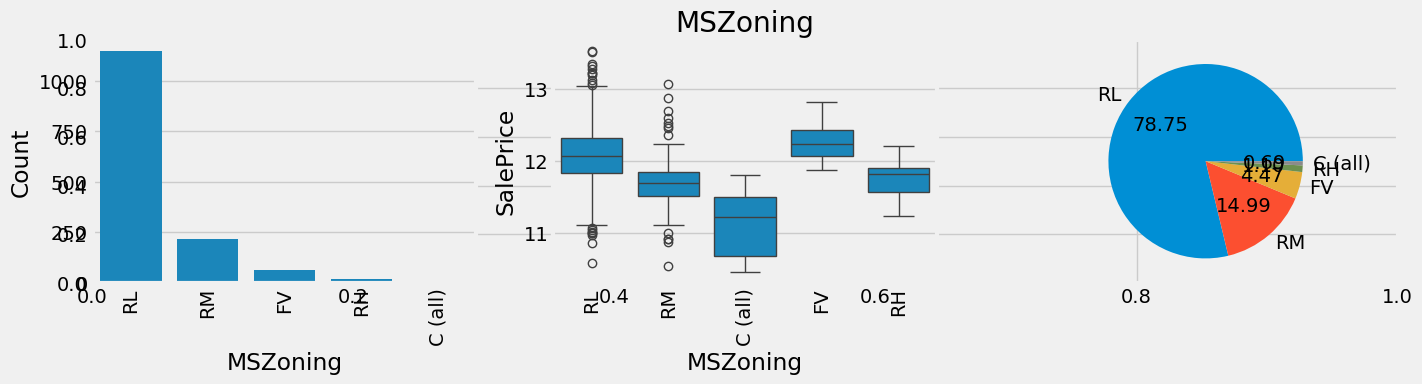

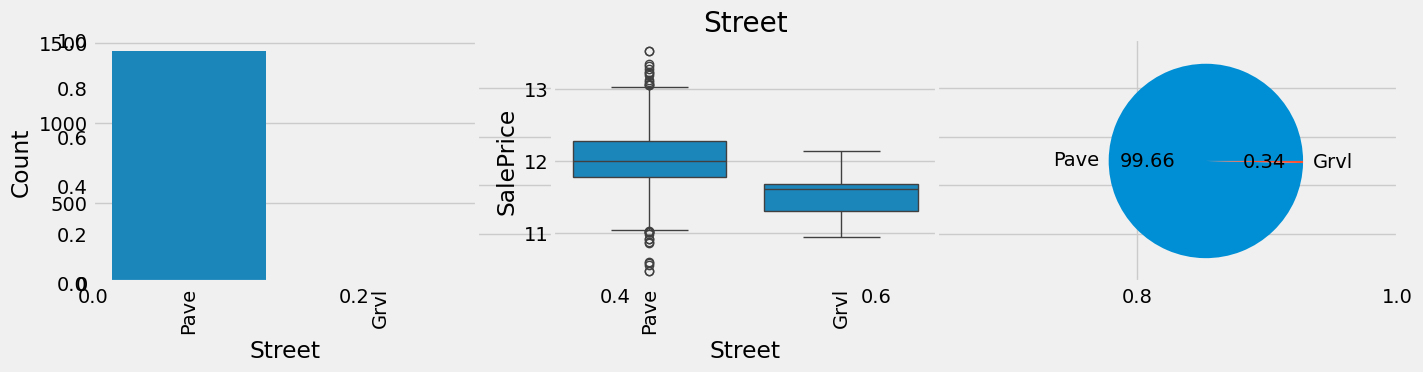

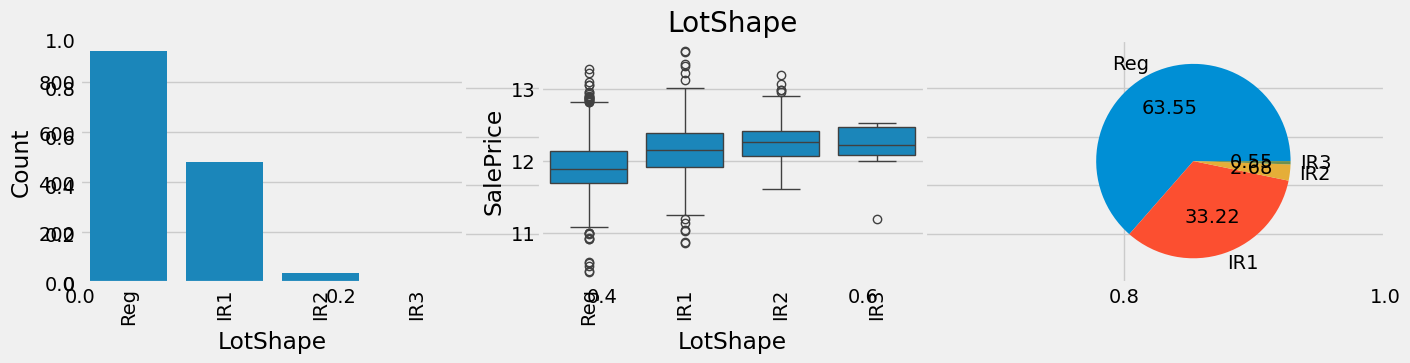

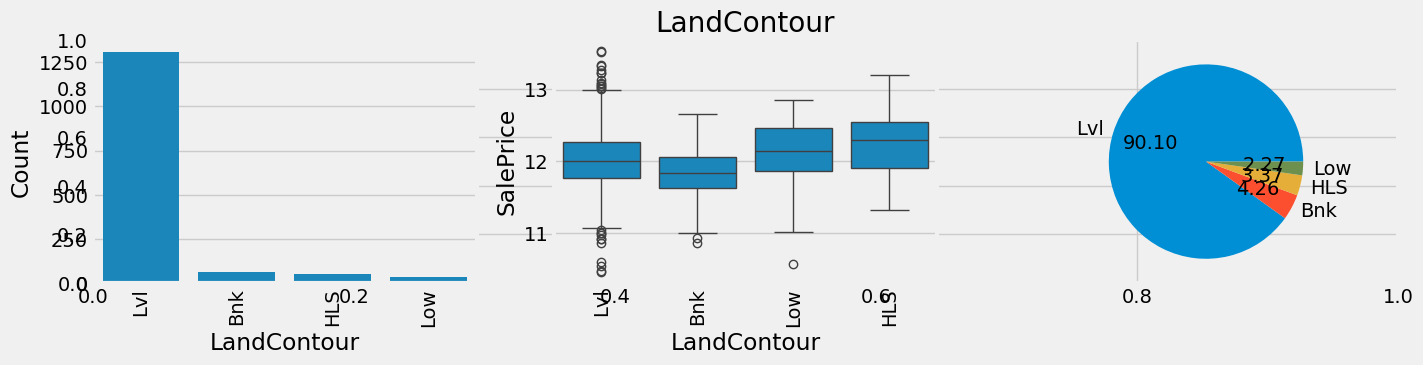

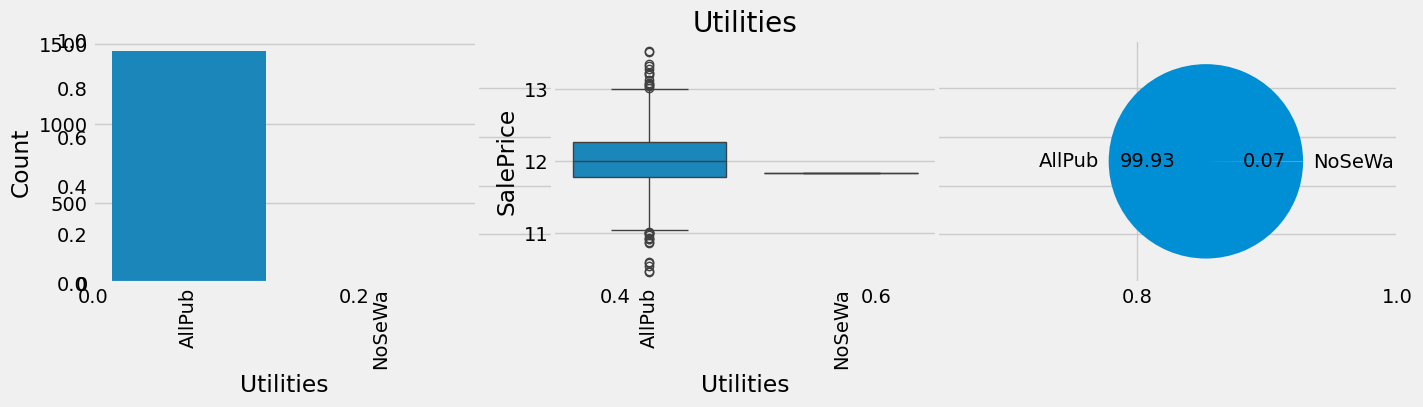

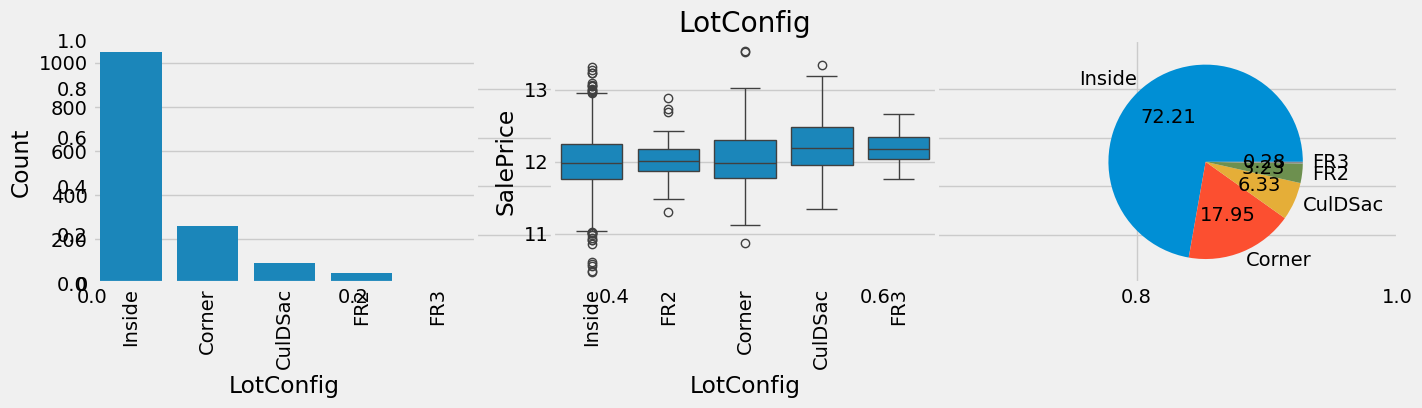

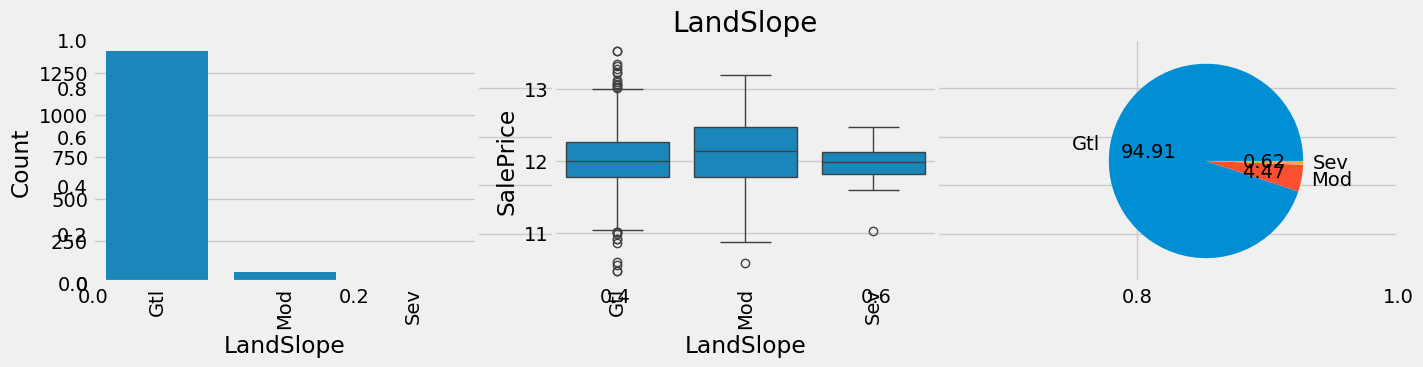

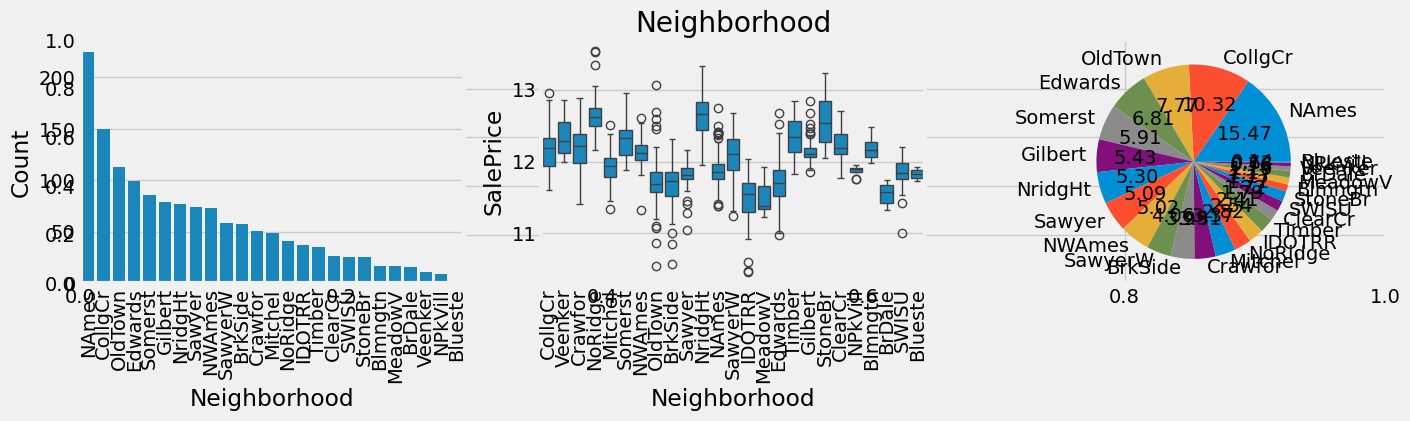

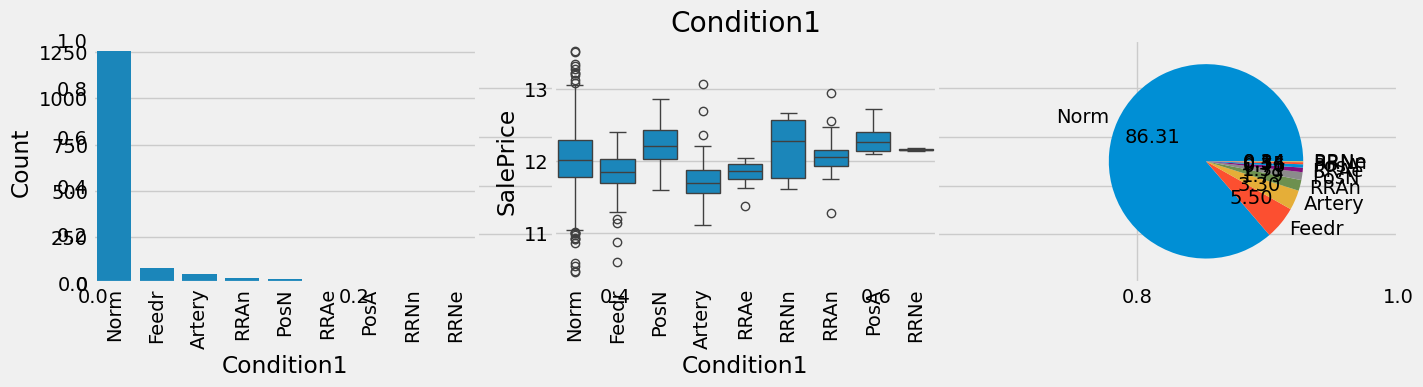

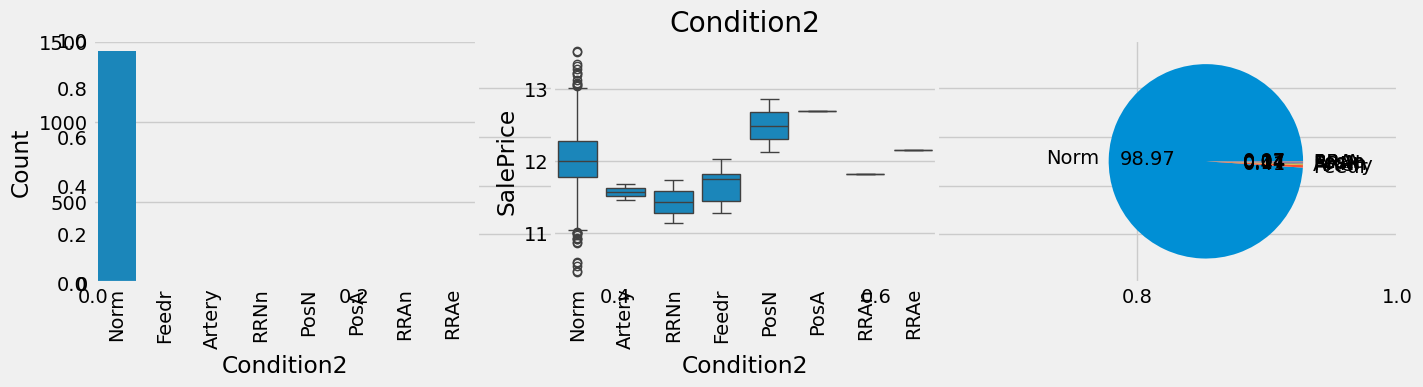

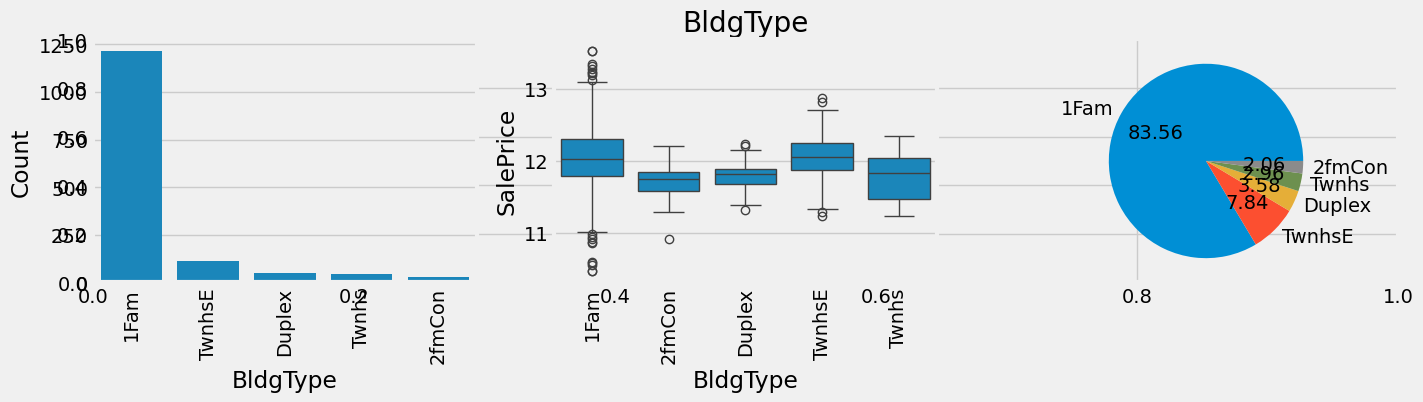

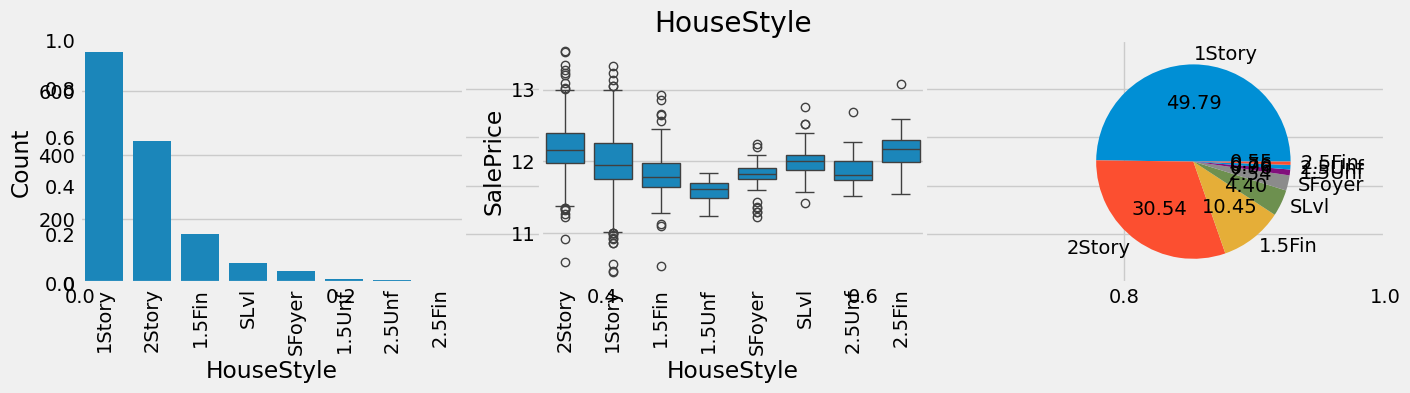

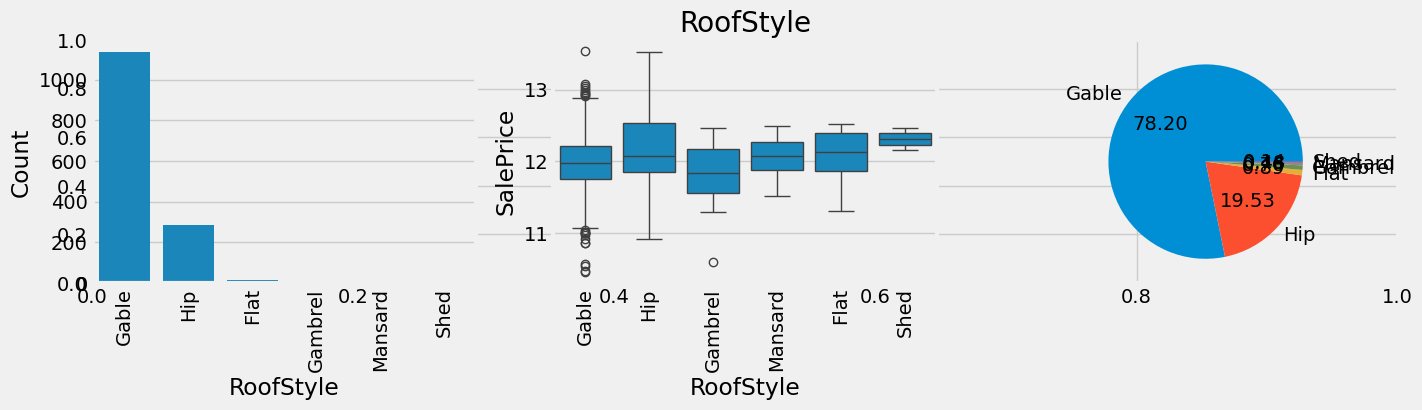

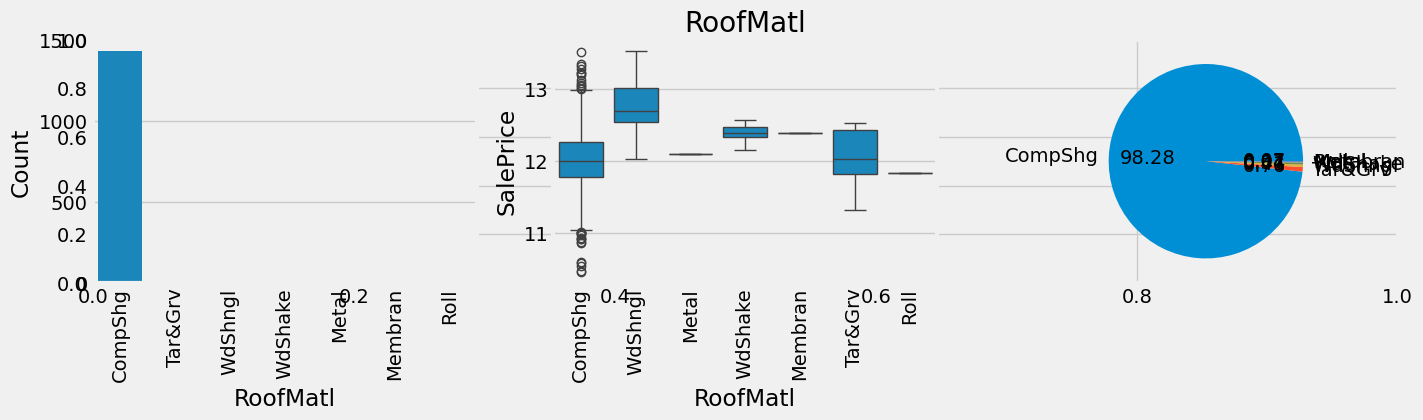

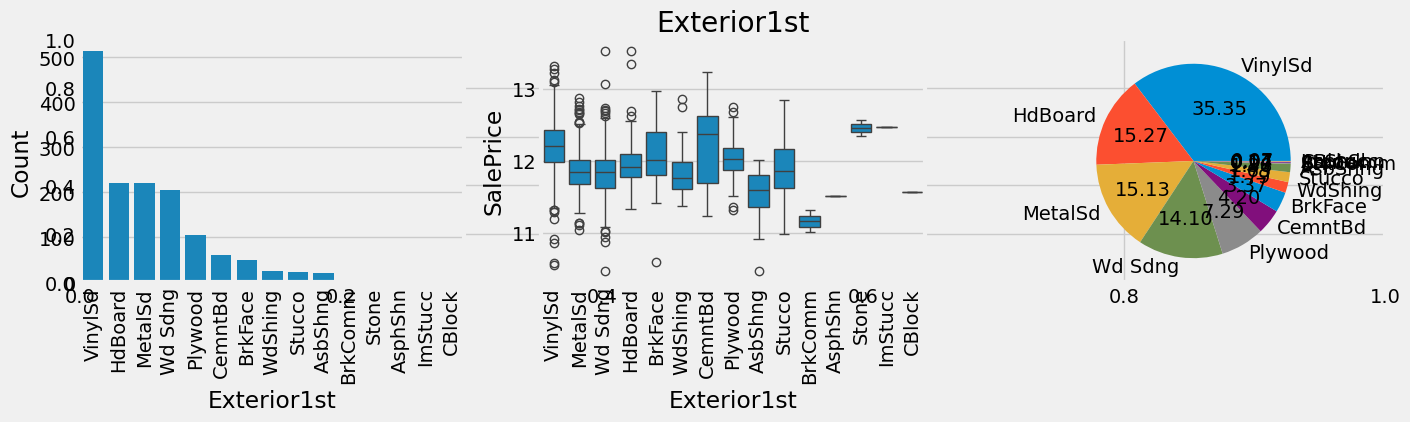

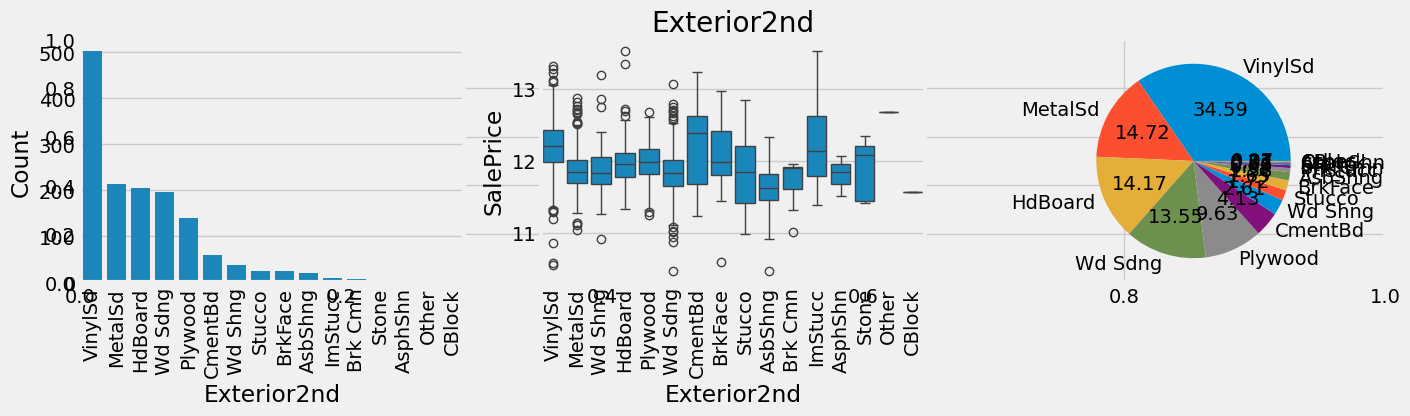

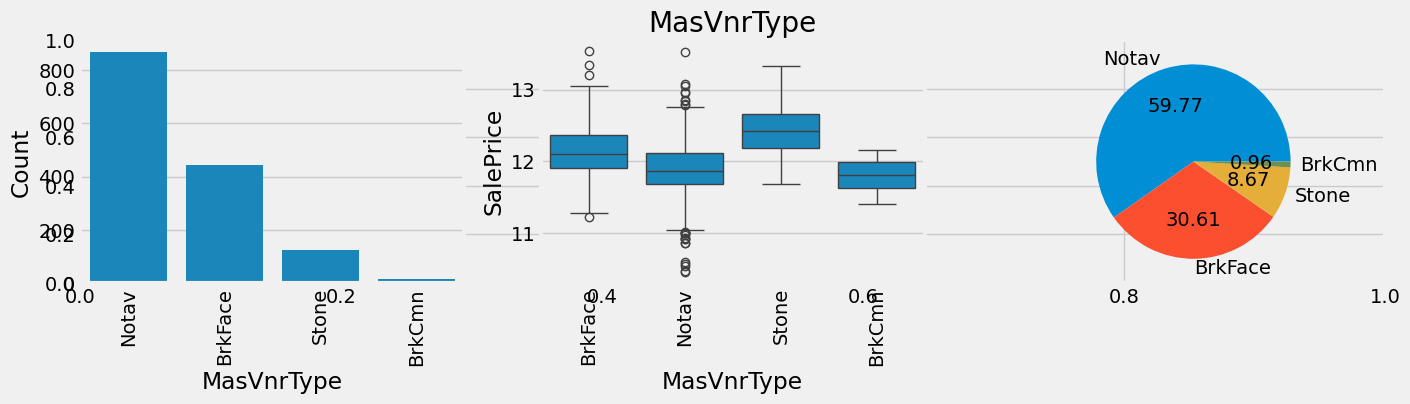

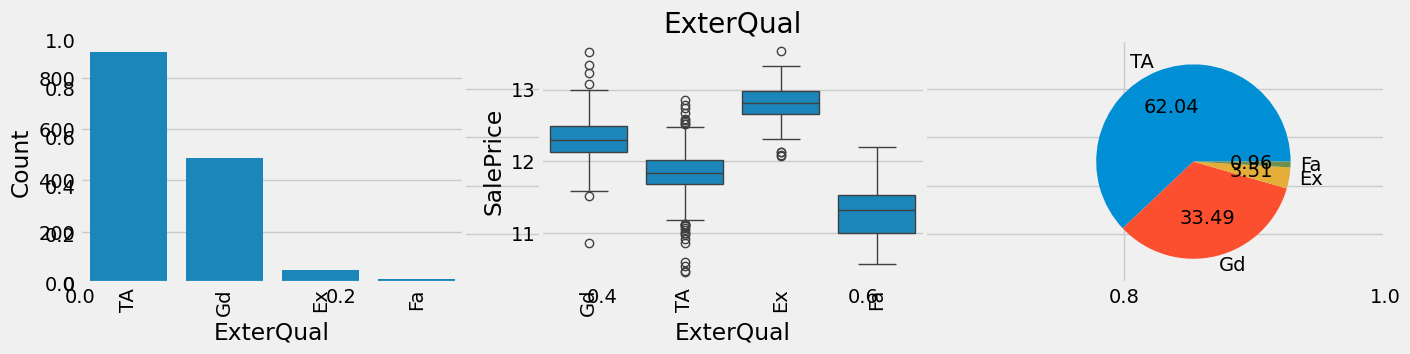

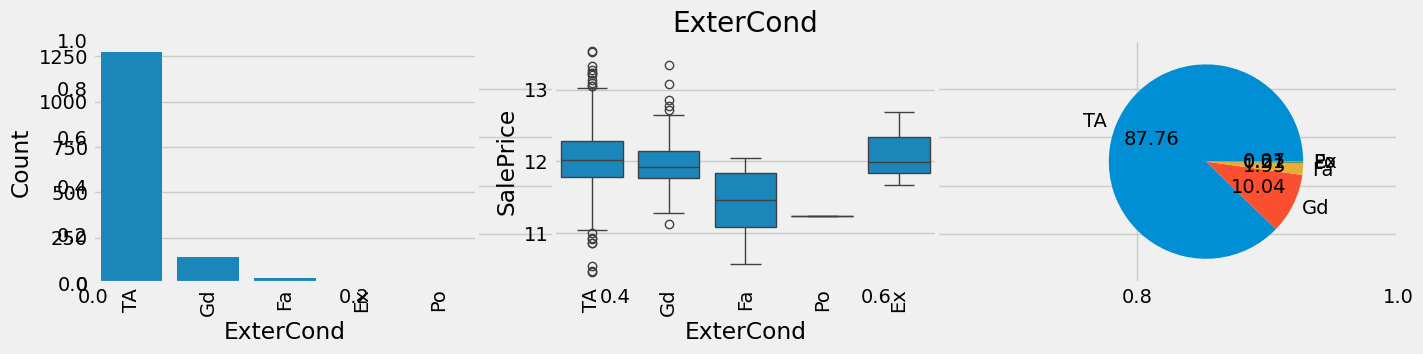

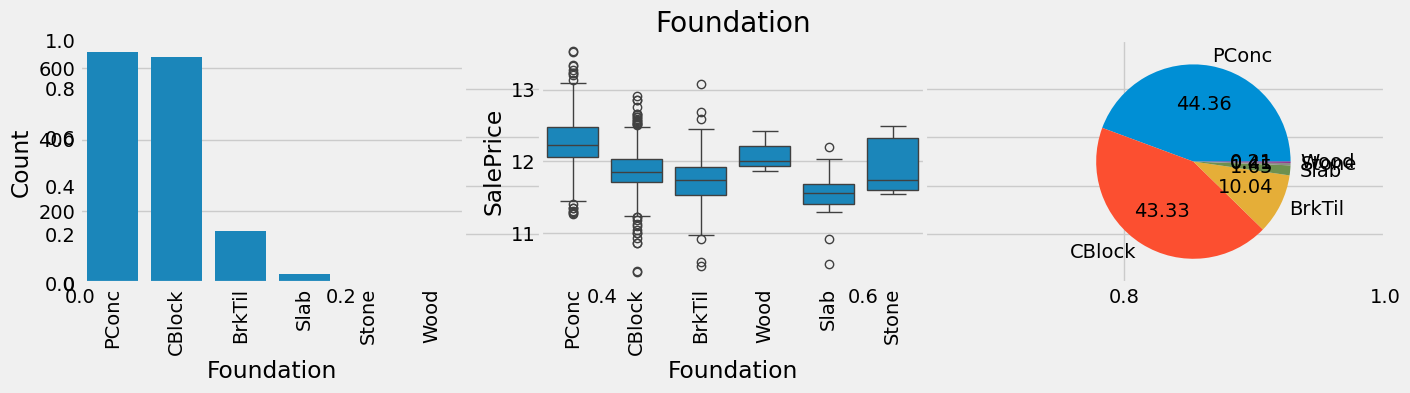

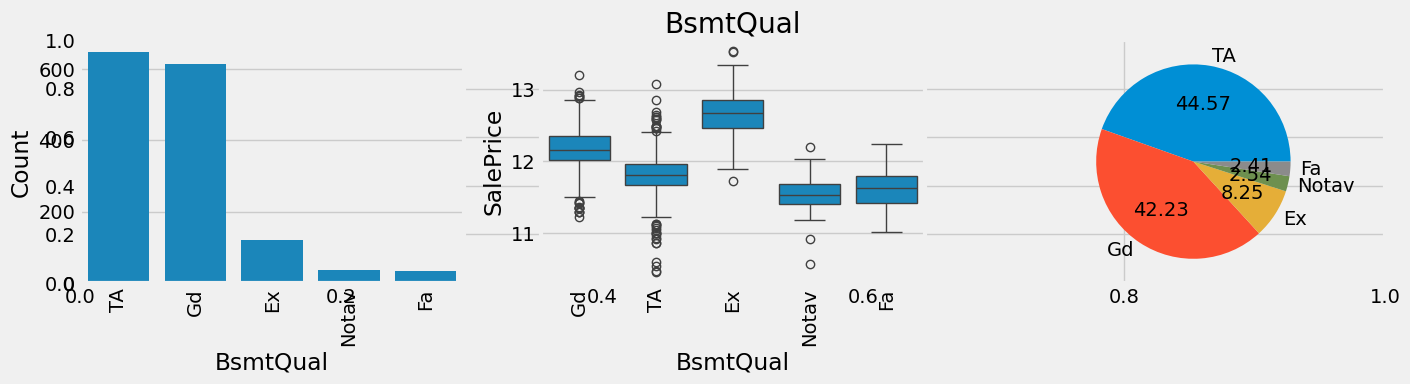

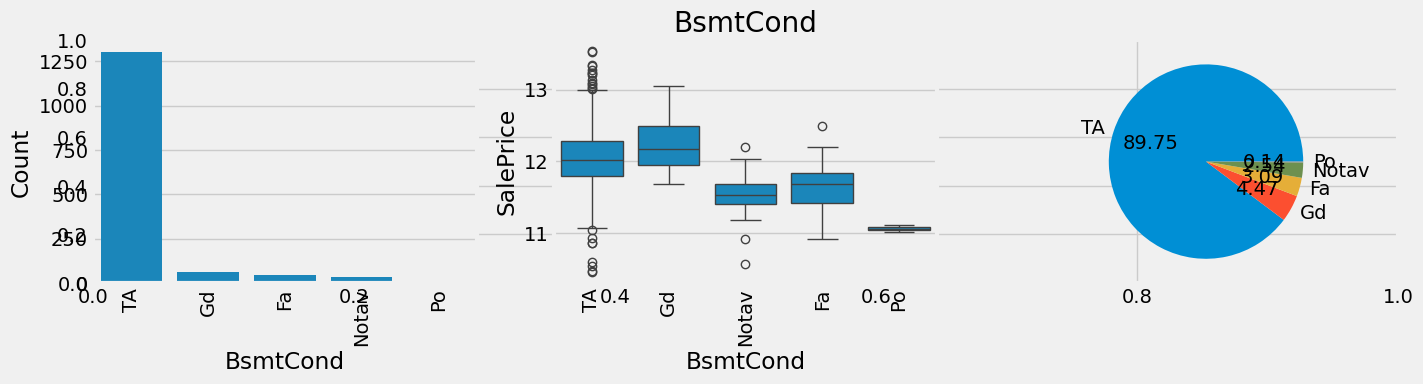

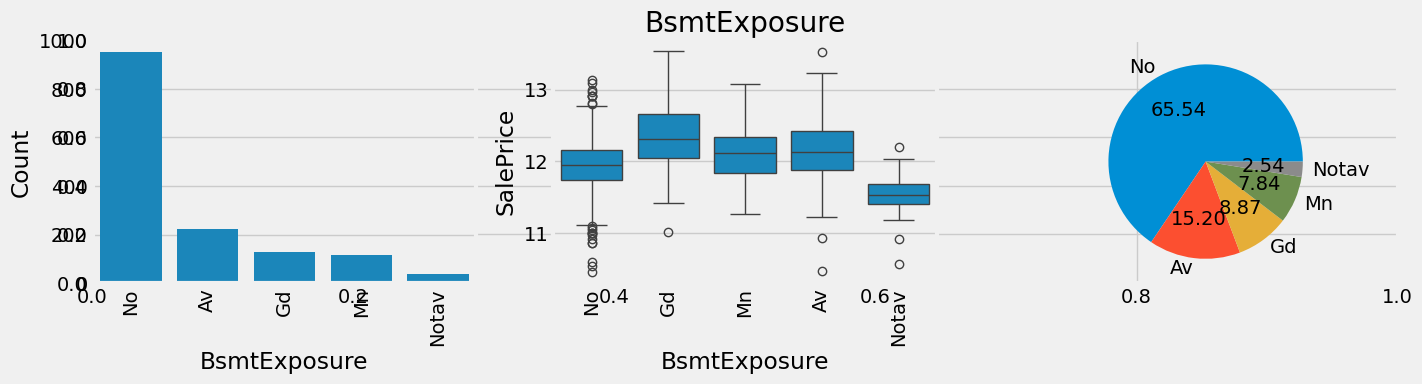

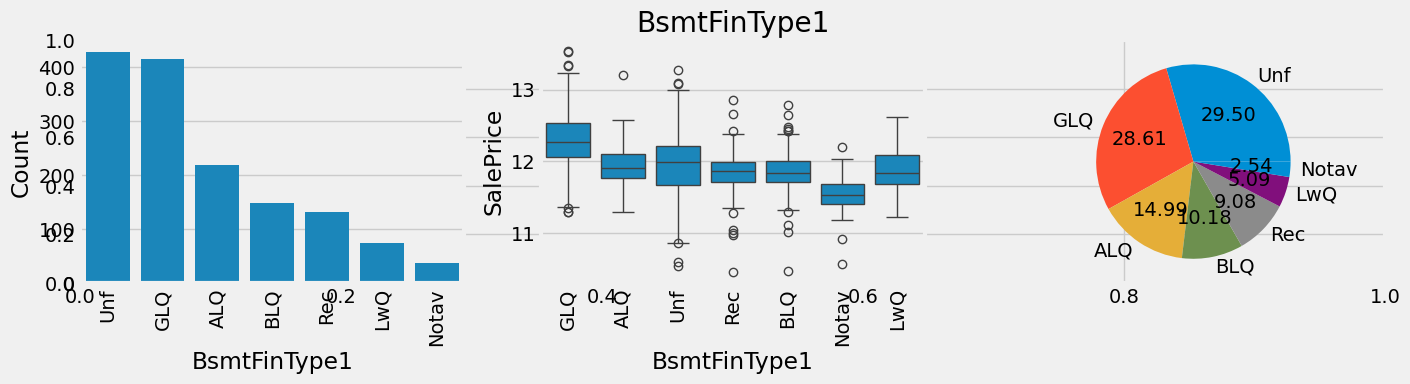

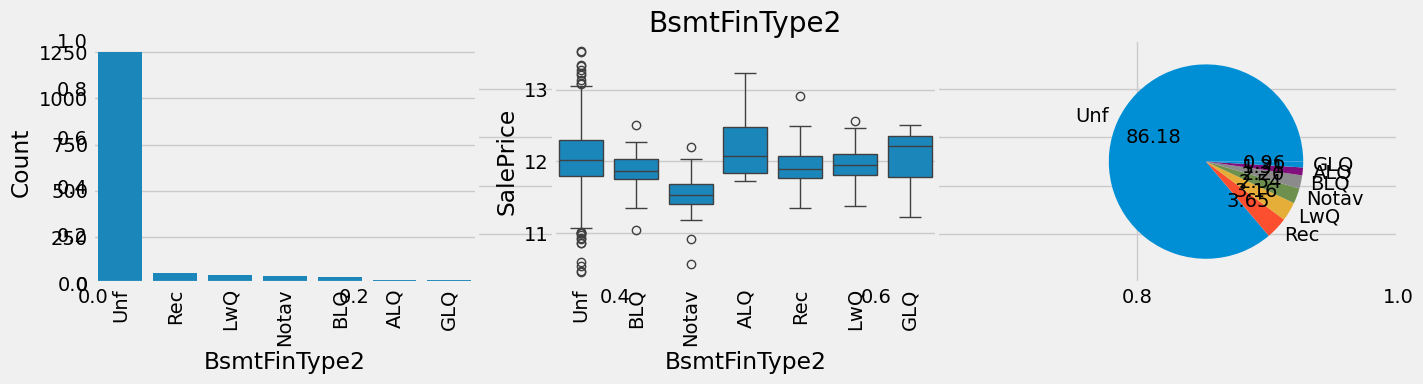

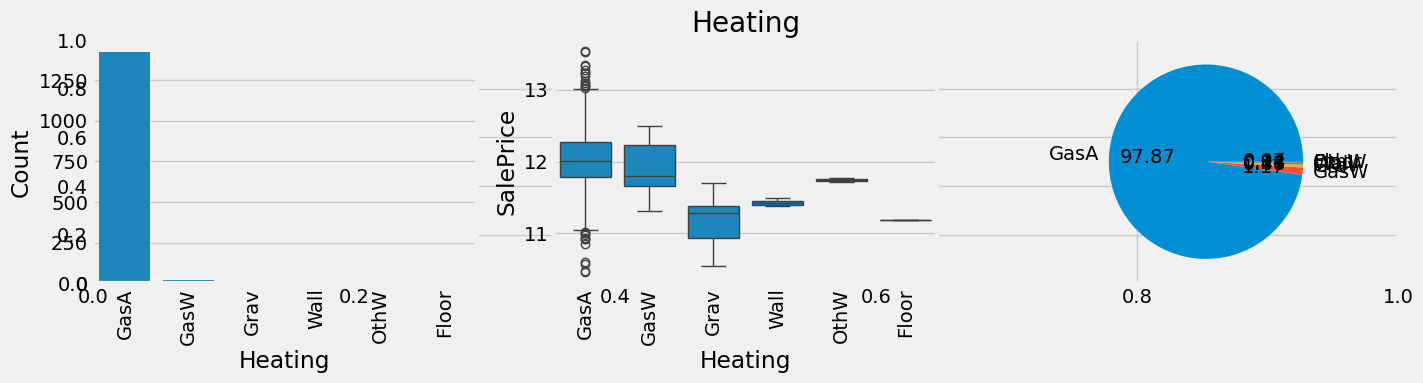

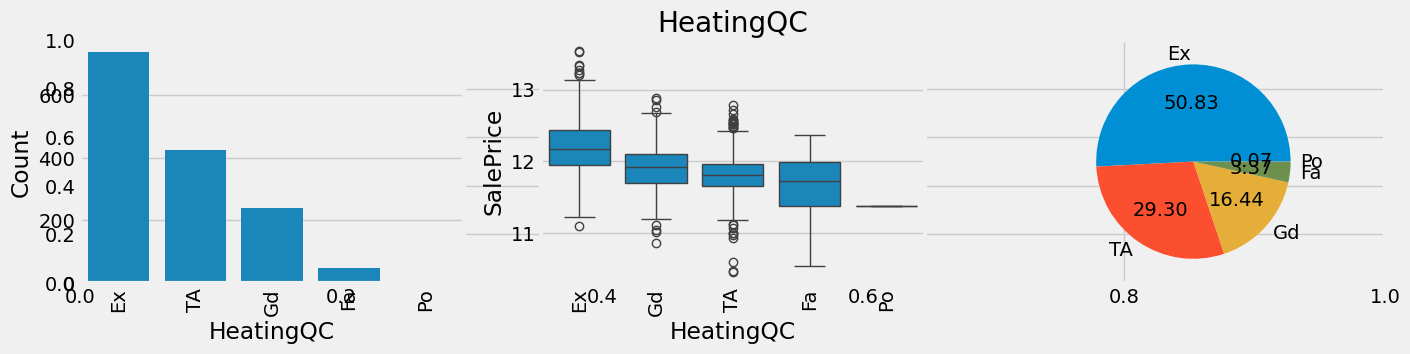

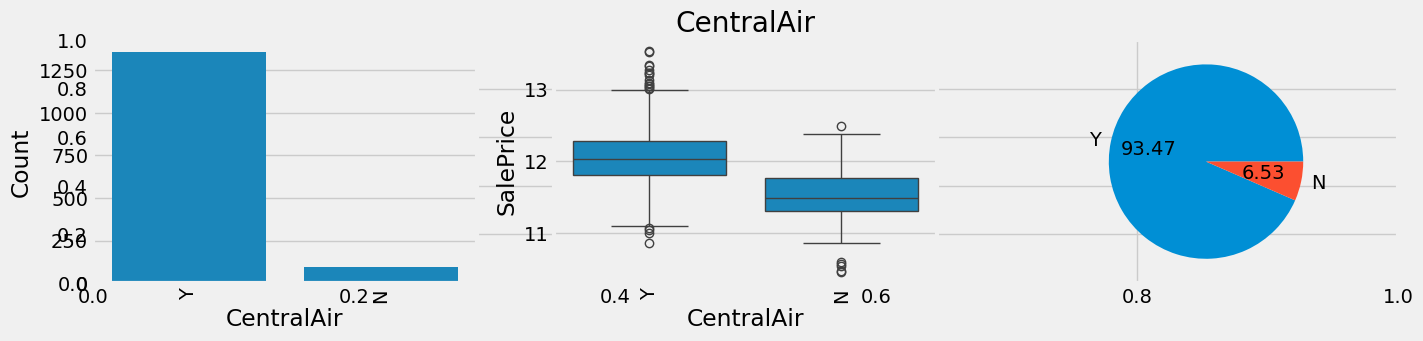

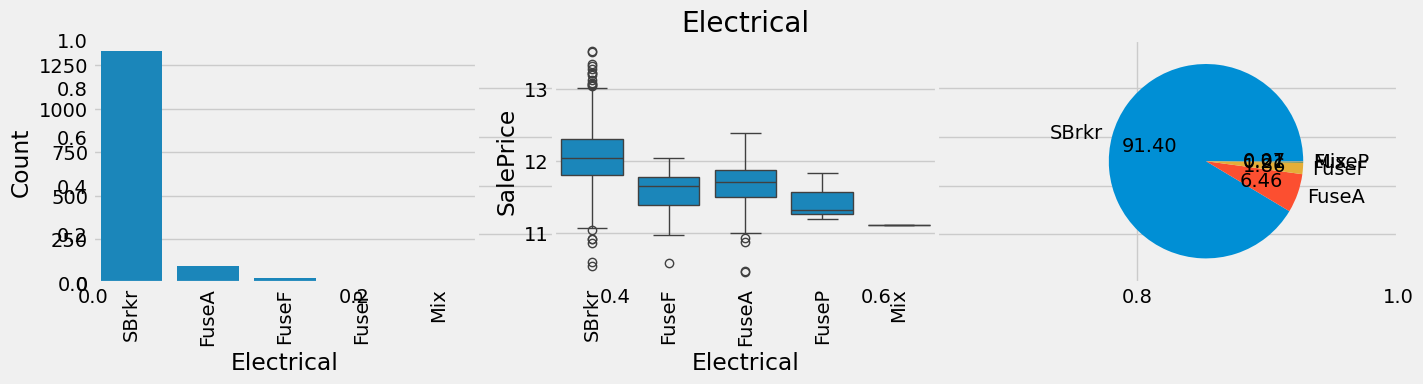

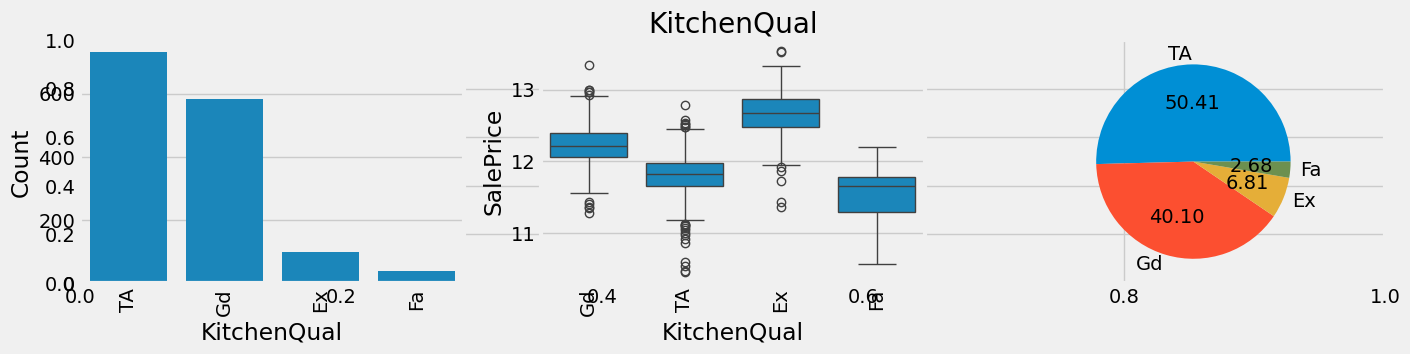

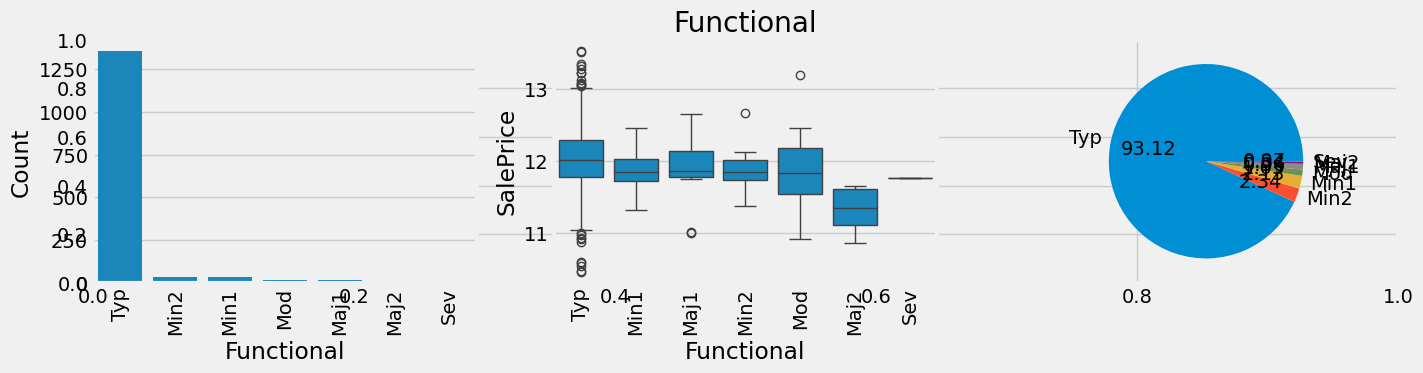

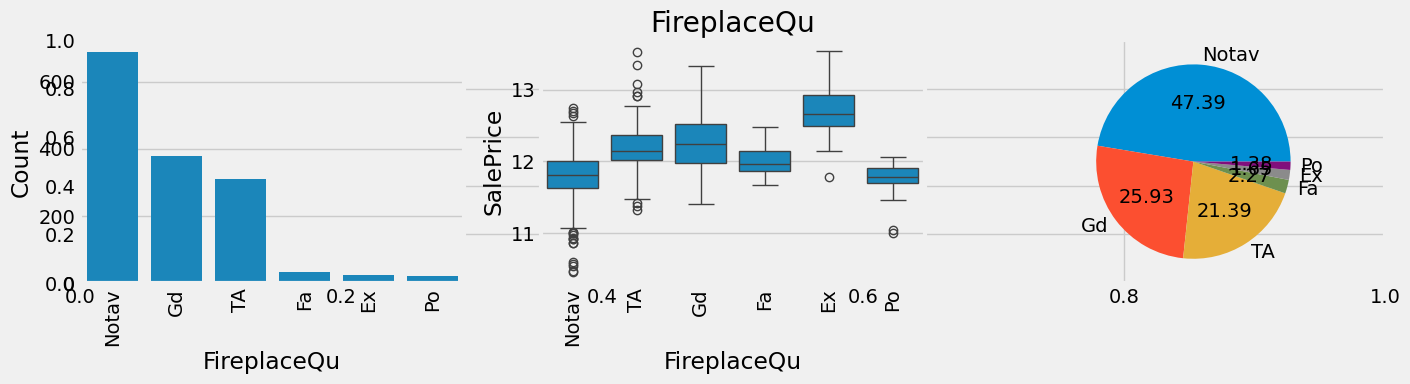

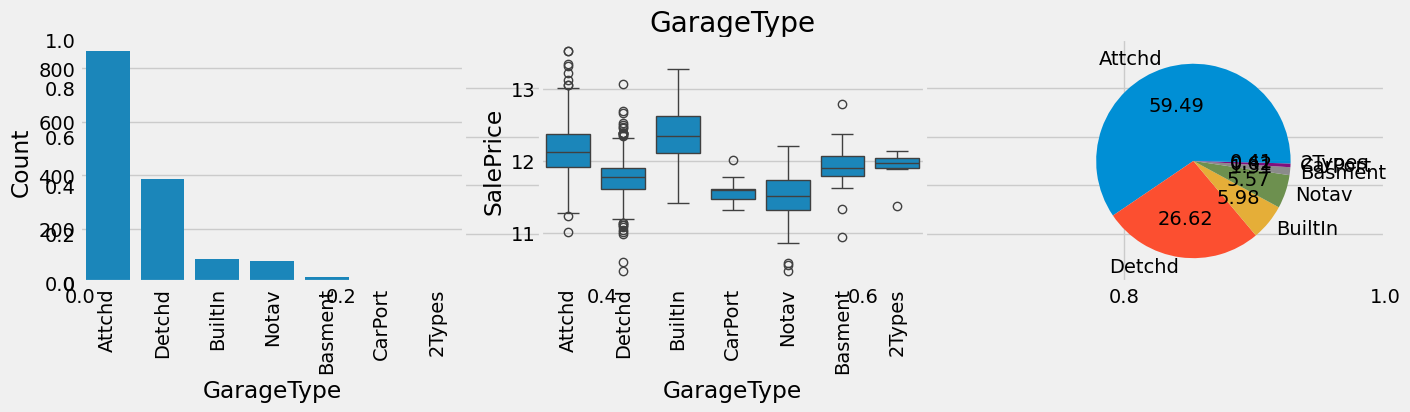

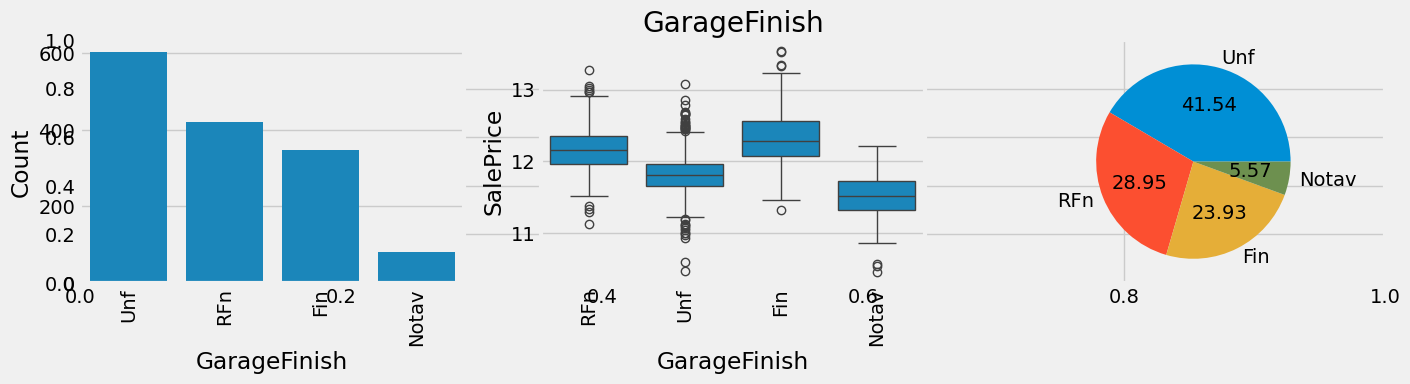

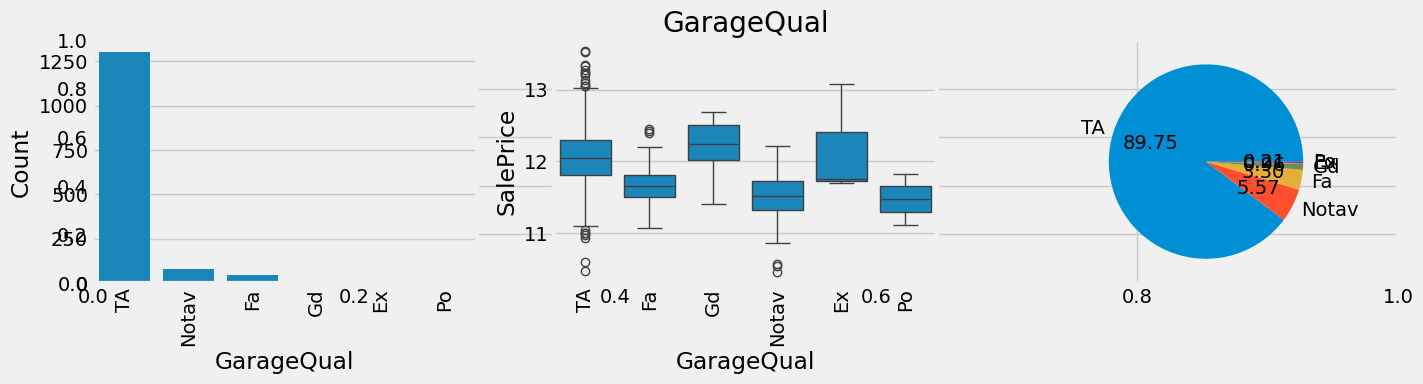

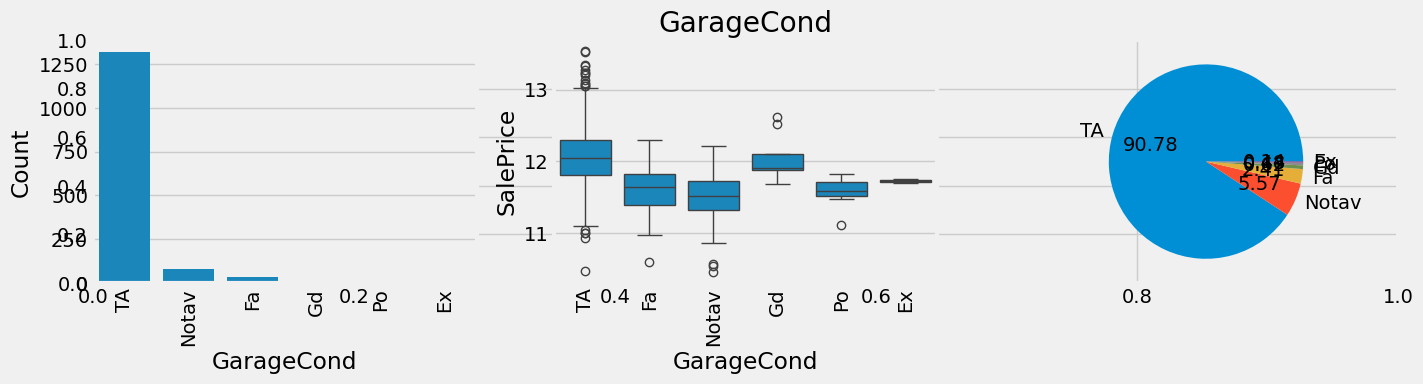

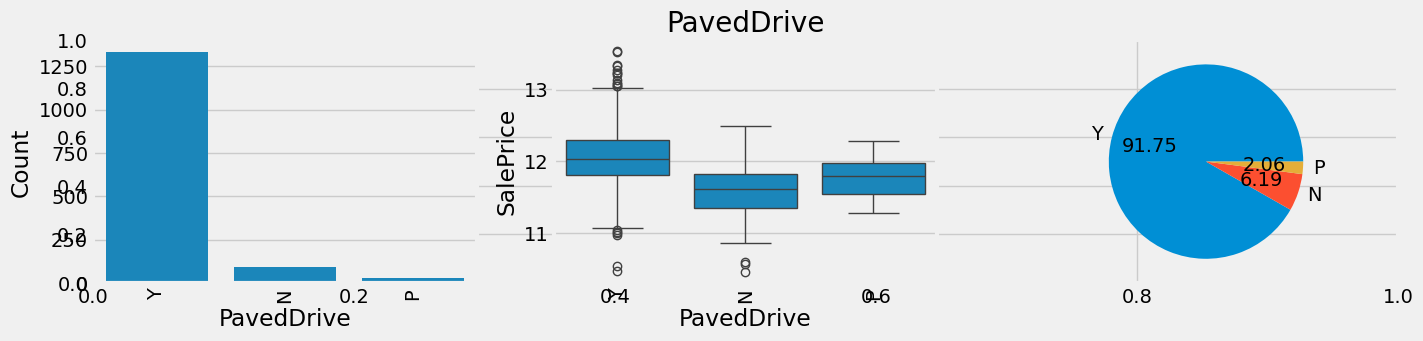

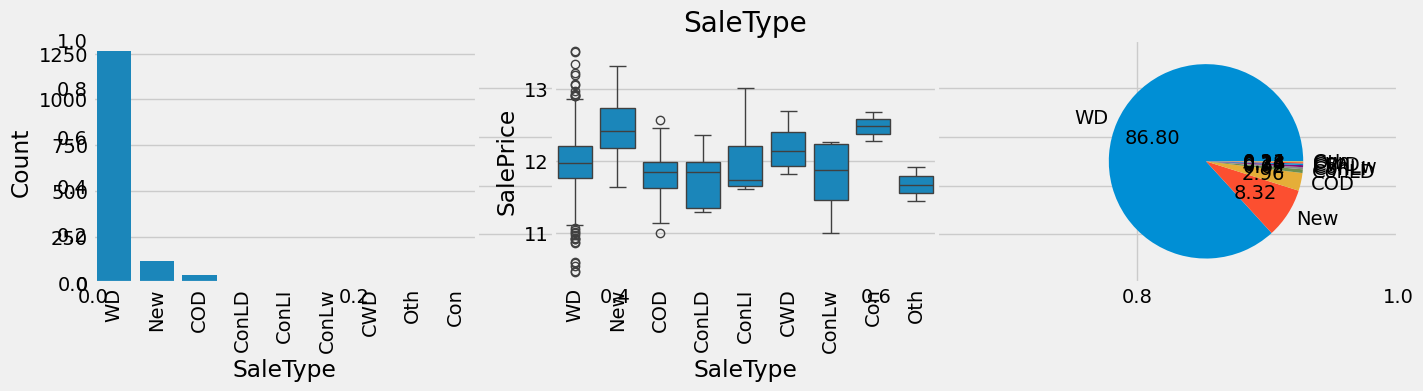

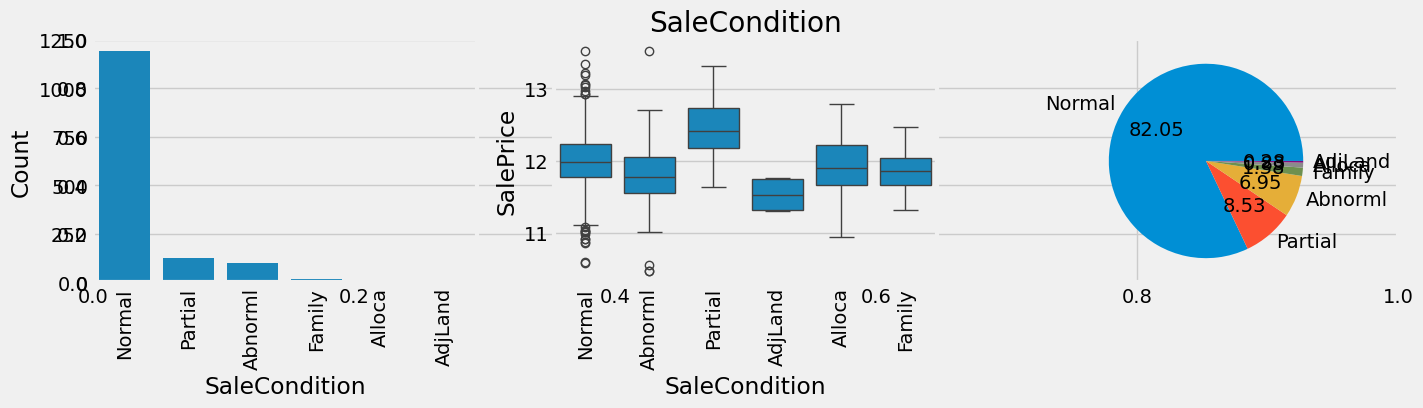

In [53]:
bar_box_pie_plot(obj_cols,df)

#### Observation
- There are multiple Columns which are heavily imbalanced. But we will not blindly remove such columns as models might still find these columns valuable.So we will use Random Forest Feature Importance to filter out unwanted columns.

- Let's Categorize data on basis of ordinal and nominal Form.

#### Ordinal Columns :     

Quality and condition Columns with categories as  ['Notav','Po','Fa','TA','Gd','Ex']:
- 'ExterQual','ExterCond','BsmtQual','BsmtCond','HeatingQC','KitchenQual','FirplaceQu','GarageQual','GarageCond'.  

Other ordinal Columns:
- 'BsmtExposure','PavedDrive','GarageType','GarageFinish'

#### Rest are nominal

## Random Forest Feature Importance
- We will use ordinal encoding to encode our categorical data.
- Since we will be using tree based models, ordinal encoding wont have much effect whether data is ordinal or nominal.
- But We will still handle ordinal data according to their rank.

In [54]:
qual_cond_categories = [['Notav','Po','Fa','TA','Gd','Ex']]
qual_cond_list = ['ExterQual','ExterCond','BsmtQual','BsmtCond','HeatingQC','KitchenQual','FireplaceQu','GarageQual','GarageCond']
othr_odn_list = ['BsmtExposure','PavedDrive','GarageType','GarageFinish','LotShape']
othr_odn_cat = [['Notav','No','Mn','Av','Gd'],['N','P','Y'],['Notav','CarPort','Detchd','Basment','2Types','Attchd','BuiltIn'],['Notav','Unf','RFn','Fin'],['IR3','IR2','IR1','Reg']]

rem_cols = obj_cols[:]
for i in ['ExterQual','ExterCond','BsmtQual','BsmtCond','HeatingQC','KitchenQual','FireplaceQu','GarageQual','GarageCond','BsmtExposure','PavedDrive','GarageType','GarageFinish','LotShape']:
    rem_cols.remove(i)

In [55]:
transformer = ColumnTransformer(
    [('qual_cond_tnf',OrdinalEncoder(categories=qual_cond_categories * len(qual_cond_list)),qual_cond_list),
     ('othr_odn',OrdinalEncoder(categories = othr_odn_cat),othr_odn_list),
     ('rem_cols',OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1),rem_cols)],
    remainder='passthrough'
)

In [56]:
temp_df = df.reset_index(drop=True).copy()

X = temp_df[obj_cols][:]
y = temp_df.iloc[:,-1]

tnf_cols = qual_cond_list + othr_odn_list + rem_cols

X_tnf = pd.DataFrame(transformer.fit_transform(X),columns=tnf_cols)
temp_df[tnf_cols] = X_tnf

temp_df

TotalHalfBath  TotalFullBath  MSSubClass  MSZoning   LotArea  Street  \
0                 1              3          60       3.0  9.042040     1.0   
1                 1              2          20       3.0  9.169623     1.0   
2                 1              3          60       3.0  9.328212     1.0   
3                 0              2          70       3.0  9.164401     1.0   
4                 1              3          60       3.0  9.565284     1.0   
...             ...            ...         ...       ...       ...     ...   
1449              1              2          60       3.0  8.976894     1.0   
1450              0              3          20       3.0  9.486152     1.0   
1451              0              2          70       3.0  9.109746     1.0   
1452              0              2          20       3.0  9.181735     1.0   
1453              1              2          20       3.0  9.204121     1.0   

      LotShape  LandContour  Utilities  LotConfig  ...  GarageFinish  \
0          3.0          3.0        0.0        4.0  ...           2.0   
1          3.0          3.0        0.0        2.0  ...           2.0   
2          2.0          3.0        0.0        4.0  ...           2.0   
3          2.0          3.0        0.0        0.0  ...           1.0   
4          2.0          3.0        0.0        2.0  ...           2.0   
...        ...          ...        ...        ...  ...           ...   
1449       3.0          3.0        0.0        4.0  ...           2.0   
1450       3.0          3.0        0.0        4.0  ...           1.0   
1451       3.0          3.0        0.0        4.0  ...           2.0   
1452       3.0          3.0        0.0        4.0  ...           1.0   
1453       3.0          3.0        0.0        4.0  ...           3.0   

      GarageCars  GarageQual  GarageCond  PavedDrive  WoodDeckSF  OpenPorchSF  \
0              2         3.0         3.0         2.0    0.000000     4.127134   
1              2         3.0         3.0         2.0    5.700444     0.000000   
2              2         3.0         3.0         2.0    0.000000     3.761200   
3              3         3.0         3.0         2.0    0.000000     3.583519   
4              3         3.0         3.0         2.0    5.262690     4.442651   
...          ...         ...         ...         ...         ...          ...   
1449           2         3.0         3.0         2.0    0.000000     3.713572   
1450           2         3.0         3.0         2.0    5.857933     0.000000   
1451           1         3.0         3.0         2.0    0.000000     4.110874   
1452           1         3.0         3.0         2.0    5.905362     0.000000   
1453           1         3.0         3.0         2.0    6.602588     4.234107   

      SaleType  SaleCondition  SalePrice  
0          8.0            4.0  12.247694  
1          8.0            4.0  12.109011  
2          8.0            4.0  12.317167  
3          8.0            0.0  11.849398  
4          8.0            4.0  12.429216  
...        ...            ...        ...  
1449       8.0            4.0  12.072541  
1450       8.0            4.0  12.254863  
1451       8.0            4.0  12.493130  
1452       8.0            4.0  11.864462  
1453       8.0            4.0  11.901583  

[1454 rows x 56 columns]

In [57]:
X = temp_df.iloc[:,:-1]
y = temp_df.iloc[:,-1]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

rf = RandomForestRegressor(random_state=42)
rf.fit(X,y)
fi = rf.feature_importances_

fi_df = pd.DataFrame(list(zip(X.columns,fi *100))).sort_values(by=1,ascending=False).reset_index(drop=True)
fi_df

0          1
0     OverallQual  57.674533
1       GrLivArea  11.946640
2     TotalBsmtSF   6.327986
3      GarageCars   3.984298
4       YearBuilt   2.003266
5         LotArea   1.826326
6      CentralAir   1.224092
7    YearRemodAdd   1.200048
8      GarageType   1.100721
9     FireplaceQu   1.041812
10       MSZoning   0.881467
11   Neighborhood   0.725097
12   BsmtFinType1   0.687053
13  TotalFullBath   0.668335
14   GarageFinish   0.667395
15    OpenPorchSF   0.542391
16       BsmtQual   0.506740
17     WoodDeckSF   0.436767
18      ExterCond   0.414791
19     MasVnrArea   0.366343
20    KitchenQual   0.341806
21  SaleCondition   0.329214
22    Exterior2nd   0.297247
23     MSSubClass   0.289343
24   BsmtExposure   0.287277
25    Exterior1st   0.274604
26   BedroomAbvGr   0.272826
27     GarageCond   0.245871
28     GarageQual   0.242737
29       BsmtCond   0.227874
30      HeatingQC   0.217866
31       LotShape   0.213182
32     HouseStyle   0.209509
33     Fireplaces   0.201721
34     PavedDrive   0.170881
35     Functional   0.168109
36  TotalHalfBath   0.164700
37      ExterQual   0.158817
38   BsmtFinType2   0.148639
39     Condition1   0.125554
40    LandContour   0.122874
41     Electrical   0.117881
42     MasVnrType   0.115392
43     Foundation   0.114761
44      RoofStyle   0.108030
45      LotConfig   0.107891
46   KitchenAbvGr   0.101892
47       SaleType   0.097757
48       BldgType   0.082684
49      LandSlope   0.081128
50       RoofMatl   0.063357
51        Heating   0.037109
52     Condition2   0.034732
53         Street   0.000609
54      Utilities   0.000025

After Removing multiple columns from above list I found that it is better to just remove 'Street' and 'Utilities' Columns. Removing more columns was decreasing base model accuracy.

In [58]:
temp_df.drop(columns = ['Street','Utilities'],inplace = True)

## Base Model
We will use Tree Based models. But you can also use Linear models or any other models.
- Linear models will perform worse in our current form of data since we have used ordinal encoding for all categorical columns.
- Here we will Use XGBoost and GradientBoosting.

In [59]:
pipe_xgb = Pipeline([('scaler', StandardScaler()), ('xgbr',XGBRegressor())])
pipe_gbm = Pipeline([('scaler', StandardScaler()),('gbm',GradientBoostingRegressor())])

kf = KFold(n_splits=5, shuffle=True, random_state=42)
scoring = ['r2', 'neg_root_mean_squared_error']

In [60]:
## XGBoostRegressor
xgb_scores = cross_validate(pipe_xgb, X, y, cv=kf, scoring=scoring,return_train_score = True)
print(f"R2: {np.mean(xgb_scores['test_r2']):.4f} ± {np.std(xgb_scores['test_r2']):.4f}")
print(f"RMSE: {-np.mean(xgb_scores['test_neg_root_mean_squared_error']):.4f} ± {np.std(xgb_scores['test_neg_root_mean_squared_error']):.4f}")

R2: 0.8650 ± 0.0231
RMSE: 0.1455 ± 0.0085


In [61]:
# Gradient Boosting
gbm_scores = cross_validate(pipe_gbm, X, y, cv=kf, scoring=scoring,return_train_score = True)
print(f"R2: {np.mean(gbm_scores['test_r2']):.4f} ± {np.std(gbm_scores['test_r2']):.4f}")
print(f"RMSE: {-np.mean(gbm_scores['test_neg_root_mean_squared_error']):.4f} ± {np.std(gbm_scores['test_neg_root_mean_squared_error']):.4f}")

R2: 0.8875 ± 0.0155
RMSE: 0.1331 ± 0.0065


## HyperParameter Tuning
- For Hyperparameter Tuning we can use GridSearchCV or RandomizedSearchCV.
- But here I will do hyperparameter tuning according to my knowledge.

In [62]:
pipe_xgb = Pipeline([('scaler', StandardScaler()), ('xgbr',XGBRegressor(tree_method="hist", device="cuda",eta=0.1,max_depth = 4,alpha = 0.31,min_child_weight=3,subsample=0.6))])
pipe_gbm = Pipeline([('scaler', StandardScaler()),('gbm',GradientBoostingRegressor(max_depth=3,n_estimators=200,alpha=0.8,max_leaf_nodes=6,learning_rate=0.1))])

In [63]:
## XGBoostRegressor
xgb_scores = cross_validate(pipe_xgb, X, y, cv=kf, scoring=scoring,return_train_score = True)
print(f"R2: {np.mean(xgb_scores['test_r2']):.4f} ± {np.std(xgb_scores['test_r2']):.4f}")
print(f"RMSE: {-np.mean(xgb_scores['test_neg_root_mean_squared_error']):.4f} ± {np.std(xgb_scores['test_neg_root_mean_squared_error']):.4f}")

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [07:23:25] WARNING: /workspace/src/context.cc:43: No visible GPU is found, setting device to CPU.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [07:23:25] WARNING: /workspace/src/context.cc:196: XGBoost is not compiled with CUDA support.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [07:23:25] WARNING: /workspace/src/context.cc:43: No visible GPU is found, setting device to CPU.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [07:23:25] WARNING: /workspace/src/context.cc:196: XGBoost is not compiled with CUDA support.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [07:23:25] WARNING: /workspace/src/context.cc:43: No visible GPU is found, setting device to CPU.
  warnin

R2: 0.8895 ± 0.0121
RMSE: 0.1321 ± 0.0052


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [07:23:25] WARNING: /workspace/src/context.cc:43: No visible GPU is found, setting device to CPU.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [07:23:25] WARNING: /workspace/src/context.cc:196: XGBoost is not compiled with CUDA support.
  warnings.warn(smsg, UserWarning)


In [64]:
# Gradient Boosting
gbm_scores = cross_validate(pipe_gbm, X, y, cv=kf, scoring=scoring,return_train_score = True)
print(f"R2: {np.mean(gbm_scores['test_r2']):.4f} ± {np.std(gbm_scores['test_r2']):.4f}")
print(f"RMSE: {-np.mean(gbm_scores['test_neg_root_mean_squared_error']):.4f} ± {np.std(gbm_scores['test_neg_root_mean_squared_error']):.4f}")

R2: 0.8910 ± 0.0189
RMSE: 0.1307 ± 0.0082


XGBoost is better after Hyperparameter Tuning. So we will use XGBRegressor.

## Model Creation

We will create proper sklearn ml pipelines which will perform data preprocessing, encoding, scaling, predictions.

In [65]:
main_feat= list(temp_df.columns)
main_feat.remove('TotalHalfBath')
main_feat.remove('TotalFullBath')
for i in ['BsmtFullBath','FullBath','BsmtHalfBath','HalfBath']:
    main_feat.append(i)
main_feat.remove('SalePrice')

In [66]:
print(main_feat)

['MSSubClass', 'MSZoning', 'LotArea', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'GrLivArea', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageCars', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'SaleType', 'SaleCondition', 'BsmtFullBath', 'FullBath', 'BsmtHalfBath', 'HalfBath']


Above Columns are the main features which will we use for predictions. Here we will also perform feature engineering on bath columns

First remove the outlier values from training data

In [67]:
train_df.drop(outliers_rows,inplace = True)
train_df['BsmtExposure'].loc[948] = 'No'
train_df['BsmtFinType2'].loc[332] = 'Unf'
train_df.drop(1379,inplace = True)

<ipython-input-67-8b0fb57867f7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['BsmtExposure'].loc[948] = 'No'
<ipython-input-67-8b0fb57867f7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['BsmtFinType2'].loc[332] = 'Unf'


Following class will handle any form of missing data, fill those garage,basement cols, etc. with Notav. Also Perform Feature Engineering and Log Transformations.
This will help us to preprocess our test data as it might also have missing values.

In [68]:
class preprocess_df(BaseEstimator, TransformerMixin):
    def fit(self,X,y):
        return self

    def transform(self,X):
        tnf_df = self.dropper(X)
        tnf_df = self.imputer(tnf_df)
        tnf_df = self.feat_eng(tnf_df)
        tnf_df = self.log_tnf(tnf_df)
        return tnf_df

    def dropper(self,df):
        return df[main_feat][:]

    def imputer(self,df):
        ## fill columns with notav
        notav_cols = ['GarageCond','GarageType','GarageFinish','GarageQual','BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2','MasVnrType','FireplaceQu']
        for i in notav_cols:
            df[i].fillna(value = 'Notav',inplace = True)
        ## imputer zero in numerical columns
        num_cols = df.select_dtypes(include='number').columns
        for i in num_cols:
            df[i].fillna(value=0,inplace = True)
        obj_cols = df.select_dtypes(include='object').columns
        ## Fill categorical obj columns with most frequent(mode)
        for i in obj_cols:
            mod = df[i].mode()[0]
            df[i].fillna(value = mod,inplace = True)
        return df

    def feat_eng(self,df):
        TotalFullBaths = df['FullBath'][:] + df['BsmtFullBath'][:]
        TotalHalfBaths = df['HalfBath'][:] + df['BsmtHalfBath'][:]
        df.insert(loc=0,column='TotalFullBath',value=TotalFullBaths)
        df.insert(loc=0,column='TotalHalfBath',value=TotalHalfBaths)
        df.drop(columns=['FullBath','BsmtFullBath','HalfBath','BsmtHalfBath'],inplace = True)
        return df

    def log_tnf(self,df):
        for i in ['LotArea', 'GrLivArea', 'MasVnrArea','WoodDeckSF','OpenPorchSF']:
            df[i] = np.log1p(df[i])
        return df

Ordinal Encoding

- We will use the already created list of columns and categories we use previously for encoding.
- Since we dropped 'Street' and 'Utilities' columns we will remove it from the list of remaining column for encoding.

In [69]:
rem_cols.remove('Street')
rem_cols.remove('Utilities')

In [70]:
odn_enc = ColumnTransformer(
    [('qual_cond_tnf',OrdinalEncoder(categories=qual_cond_categories * len(qual_cond_list)),qual_cond_list),
     ('othr_odn',OrdinalEncoder(categories = othr_odn_cat),othr_odn_list),
     ('rem_cols',OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1),rem_cols)],
    remainder='passthrough'
)

In [71]:
model = Pipeline(
    [('preprocesser',preprocess_df()),
    ('encoding',odn_enc),
    ('scaler',StandardScaler()),
    ('xgb_reg',XGBRegressor(tree_method="hist", device="cuda",eta=0.1,max_depth = 4,alpha = 0.31,min_child_weight=3,subsample=0.6))]
)

In [72]:
X = train_df.iloc[:,:-1]
y = np.log1p(train_df['SalePrice'])

In [73]:
model.fit(X,y)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [07:24:14] WARNING: /workspace/src/context.cc:43: No visible GPU is found, setting device to CPU.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [07:24:14] WARNING: /workspace/src/context.cc:196: XGBoost is not compiled with CUDA support.
  warnings.warn(smsg, UserWarning)


Pipeline(steps=[('preprocesser', preprocess_df()),
                ('encoding',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('qual_cond_tnf',
                                                  OrdinalEncoder(categories=[['Notav',
                                                                              'Po',
                                                                              'Fa',
                                                                              'TA',
                                                                              'Gd',
                                                                              'Ex'],
                                                                             ['Notav',
                                                                              'Po',
                                                                              'Fa',
                                                                              'TA',
                                                                              'Gd',
                                                                              'Ex'],
                                                                             ['Notav',
                                                                              'Po',
                                                                              'Fa',
                                                                              'TA',
                                                                              'Gd',
                                                                              'Ex'],
                                                                             ['Notav',
                                                                              'Po',
                                                                              'Fa',
                                                                              'TA',
                                                                              'Gd',
                                                                              'Ex'],
                                                                             ['Notav',
                                                                              'Po',
                                                                              'Fa',
                                                                              'TA',
                                                                              'Gd',
                                                                              'Ex'],
                                                                             ['Notav',
                                                                              'Po',...
                              eval_metric=None, feature_types=None, gamma=None,
                              grow_policy=None, importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=4, max_leaves=None, min_child_weight=3,
                              missing=nan, monotone_constraints=None,
                              multi_strategy=None, n_estimators=None,
                              n_jobs=None, ...))])

In [74]:
## XGBoostRegressor
xgb_scores = cross_validate(model, X, y, cv=kf, scoring=scoring,return_train_score = True)
print(f"R2: {np.mean(xgb_scores['test_r2']):.4f} ± {np.std(xgb_scores['test_r2']):.4f}")
print(f"RMSE: {-np.mean(xgb_scores['test_neg_root_mean_squared_error']):.4f} ± {np.std(xgb_scores['test_neg_root_mean_squared_error']):.4f}")

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [07:24:19] WARNING: /workspace/src/context.cc:43: No visible GPU is found, setting device to CPU.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [07:24:19] WARNING: /workspace/src/context.cc:196: XGBoost is not compiled with CUDA support.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [07:24:19] WARNING: /workspace/src/context.cc:43: No visible GPU is found, setting device to CPU.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [07:24:19] WARNING: /workspace/src/context.cc:196: XGBoost is not compiled with CUDA support.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [07:24:20] WARNING: /workspace/src/context.cc:43: No visible GPU is found, setting device to CPU.
  warnin

R2: 0.8912 ± 0.0129
RMSE: 0.1310 ± 0.0052


## Predictions

In [75]:
ypreds = model.predict(test_df)

In [76]:
test_preds = np.expm1(ypreds)

In [77]:
test_id = test_df['Id'].values

In [78]:
submission = pd.DataFrame({'Id' : test_id, 'Saleprice': test_preds})

In [80]:
submission

Id      Saleprice
0     1461  120044.859375
1     1462  155732.296875
2     1463  178706.031250
3     1464  186929.046875
4     1465  190984.937500
...    ...            ...
1454  2915   78536.070312
1455  2916   74592.562500
1456  2917  147559.671875
1457  2918  124973.453125
1458  2919  223642.203125

[1459 rows x 2 columns]

In [81]:
submission.to_csv('submission.csv', index=False)

## Conclusions

- This dataset have a high scope of Feature Engineering. This will help in reducing noise in data and improve model accuracy.
- We also use some more powerful models like LightGBM, CatBoost etc.